In [1]:
from training_functions import *
from merging import *
from utils import *
from lightgbm import LGBMClassifier

/home/olyaolya/anaconda3/envs/material-project/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_mpdb_plane, cnt_and_name_features_mpdb = get_featurizers_features_mpdb()

X_mpdb = df_mpdb_plane.drop([ 
     'formula_pretty',
     'material_id', 
 ], axis=1)

In [4]:
df_kahle_fin, cnt_and_name_features_kahle = get_featurizers_features()

X = df_kahle_fin.drop([ 
    'stru_label',
     'stru_id', 
     'group', 
     'structure', 
     'diffusion_mean_cm2_s', 
     'label', 
     'src_id', 
     'diffusion_sem_cm2_s', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err'
 ], axis=1)


feature_names = X.columns.tolist()


In [5]:

feature_names = np.array(feature_names)[~np.all(X.to_numpy() == 0, axis=0)]

X = X.to_numpy()
X_mpdb = X_mpdb.to_numpy()

X_mpdb = X_mpdb[:, ~np.all(X == 0, axis=0)]


X_mpdb = StandardScaler().fit_transform(X_mpdb)
X = X[:, ~np.all(X == 0, axis=0)]

feature_weights = [1 / cnt_and_name_features_kahle['_'.join(x.split('_')[1:])] for x in feature_names]

In [6]:
params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "max_depth": 3,
        "learning_rate" : 0.5,
        "n_estimators": 3,
        "verbosity" : -1,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, preds_kahle, feature_importance, feature_entarances, y, preds_mpdb = evaluate_parameters(params, X, df_kahle_fin, feature_weights, thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'lightgbm', X_mpdb = X_mpdb)

  1%|          | 1/116 [00:00<00:40,  2.87it/s]

roc-auc on train for 0 fold with size 118: 0.8953261927945473


100%|██████████| 116/116 [00:27<00:00,  4.25it/s]


test roc-auc mean: 0.643653373269051, std: 0.06188670765728997
mean train roc-auc: 0.9196540106845951


  1%|          | 1/116 [00:00<00:26,  4.40it/s]

roc-auc on train for 0 fold with size 118: 0.9256734826355079


100%|██████████| 116/116 [00:26<00:00,  4.30it/s]


test roc-auc mean: 0.6608367196867083, std: 0.06505954144293245
mean train roc-auc: 0.9193408900587055


  1%|          | 1/116 [00:00<00:26,  4.34it/s]

roc-auc on train for 0 fold with size 118: 0.9079844206426485


100%|██████████| 116/116 [00:26<00:00,  4.33it/s]


test roc-auc mean: 0.6457446213133199, std: 0.06598748736912362
mean train roc-auc: 0.9186812516235858


  1%|          | 1/116 [00:00<00:26,  4.34it/s]

roc-auc on train for 0 fold with size 118: 0.904901006166829


100%|██████████| 116/116 [00:26<00:00,  4.32it/s]


test roc-auc mean: 0.7110613858754419, std: 0.057470221716577986
mean train roc-auc: 0.9193760728185336


  1%|          | 1/116 [00:00<00:26,  4.34it/s]

roc-auc on train for 0 fold with size 118: 0.9154495293735799


100%|██████████| 116/116 [00:26<00:00,  4.34it/s]


test roc-auc mean: 0.5981201657923617, std: 0.06344286938702381
mean train roc-auc: 0.919810870357722


  1%|          | 1/116 [00:00<00:25,  4.46it/s]

roc-auc on train for 0 fold with size 118: 0.9243752028562155


100%|██████████| 116/116 [00:26<00:00,  4.32it/s]


test roc-auc mean: 0.6505506543809129, std: 0.06532588627001966
mean train roc-auc: 0.9185544563644868


  1%|          | 1/116 [00:00<00:27,  4.11it/s]

roc-auc on train for 0 fold with size 118: 0.9173969490425186


100%|██████████| 116/116 [00:26<00:00,  4.35it/s]


test roc-auc mean: 0.6513198407897919, std: 0.06655858522627271
mean train roc-auc: 0.9185140590770314


  1%|          | 1/116 [00:00<00:26,  4.38it/s]

roc-auc on train for 0 fold with size 118: 0.9172346640701071


100%|██████████| 116/116 [00:27<00:00,  4.28it/s]


test roc-auc mean: 0.6714182637273207, std: 0.061167368448719166
mean train roc-auc: 0.9208408368963867


  1%|          | 1/116 [00:00<00:25,  4.46it/s]

roc-auc on train for 0 fold with size 118: 0.9308666017526778


100%|██████████| 116/116 [00:27<00:00,  4.29it/s]


test roc-auc mean: 0.6460183512714555, std: 0.061365001862195824
mean train roc-auc: 0.9215744976013633


  1%|          | 1/116 [00:00<00:27,  4.22it/s]

roc-auc on train for 0 fold with size 118: 0.9505030834144758


100%|██████████| 116/116 [00:26<00:00,  4.33it/s]


test roc-auc mean: 0.6483491679224839, std: 0.061747740143967826
mean train roc-auc: 0.9210432430361779


  1%|          | 1/116 [00:00<00:26,  4.28it/s]

roc-auc on train for 0 fold with size 118: 0.8962999026290166


100%|██████████| 116/116 [00:26<00:00,  4.31it/s]


test roc-auc mean: 0.6599251412586542, std: 0.06488804403407765
mean train roc-auc: 0.9200006808200661


  1%|          | 1/116 [00:00<00:25,  4.43it/s]

roc-auc on train for 0 fold with size 118: 0.9208049334631613


100%|██████████| 116/116 [00:26<00:00,  4.34it/s]


test roc-auc mean: 0.6564169179179844, std: 0.06609635419867232
mean train roc-auc: 0.9206600873143221


  1%|          | 1/116 [00:00<00:26,  4.41it/s]

roc-auc on train for 0 fold with size 118: 0.909607270366764


100%|██████████| 116/116 [00:26<00:00,  4.34it/s]


test roc-auc mean: 0.640111088100512, std: 0.06345975369045447
mean train roc-auc: 0.9170797786555206


  1%|          | 1/116 [00:00<00:26,  4.35it/s]

roc-auc on train for 0 fold with size 118: 0.8864005193119118


100%|██████████| 116/116 [00:26<00:00,  4.33it/s]


test roc-auc mean: 0.6658142707932416, std: 0.06243436387557772
mean train roc-auc: 0.918341827799298


  1%|          | 1/116 [00:00<00:25,  4.53it/s]

roc-auc on train for 0 fold with size 118: 0.9237260629665693


100%|██████████| 116/116 [00:26<00:00,  4.31it/s]


test roc-auc mean: 0.6569974278403351, std: 0.06404729881495007
mean train roc-auc: 0.9188548538374948


  1%|          | 1/116 [00:00<00:25,  4.45it/s]

roc-auc on train for 0 fold with size 118: 0.9152872444011685


100%|██████████| 116/116 [00:26<00:00,  4.34it/s]


test roc-auc mean: 0.6594665886644975, std: 0.06287877847132049
mean train roc-auc: 0.9171009681101194


  1%|          | 1/116 [00:00<00:27,  4.13it/s]

roc-auc on train for 0 fold with size 118: 0.8977604673807206


100%|██████████| 116/116 [00:26<00:00,  4.33it/s]


test roc-auc mean: 0.6707940857260807, std: 0.06651665874055109
mean train roc-auc: 0.9202395141008263


  1%|          | 1/116 [00:00<00:26,  4.31it/s]

roc-auc on train for 0 fold with size 118: 0.9123661148977605


100%|██████████| 116/116 [00:26<00:00,  4.30it/s]


test roc-auc mean: 0.6946190053803885, std: 0.06092915606805263
mean train roc-auc: 0.9213593890176957


  1%|          | 1/116 [00:00<00:26,  4.42it/s]

roc-auc on train for 0 fold with size 118: 0.890295358649789


100%|██████████| 116/116 [00:26<00:00,  4.32it/s]


test roc-auc mean: 0.6666545846475731, std: 0.058150816345178664
mean train roc-auc: 0.9186200321212324


  1%|          | 1/116 [00:00<00:26,  4.40it/s]

roc-auc on train for 0 fold with size 118: 0.9204803635183383


 24%|██▍       | 28/116 [00:06<00:20,  4.32it/s]

In [ ]:
np.savetxt('predictions/lightgbm_only_featurizers_max_depth_3_lr_0.5_n_estimators_3.txt', preds_mpdb)

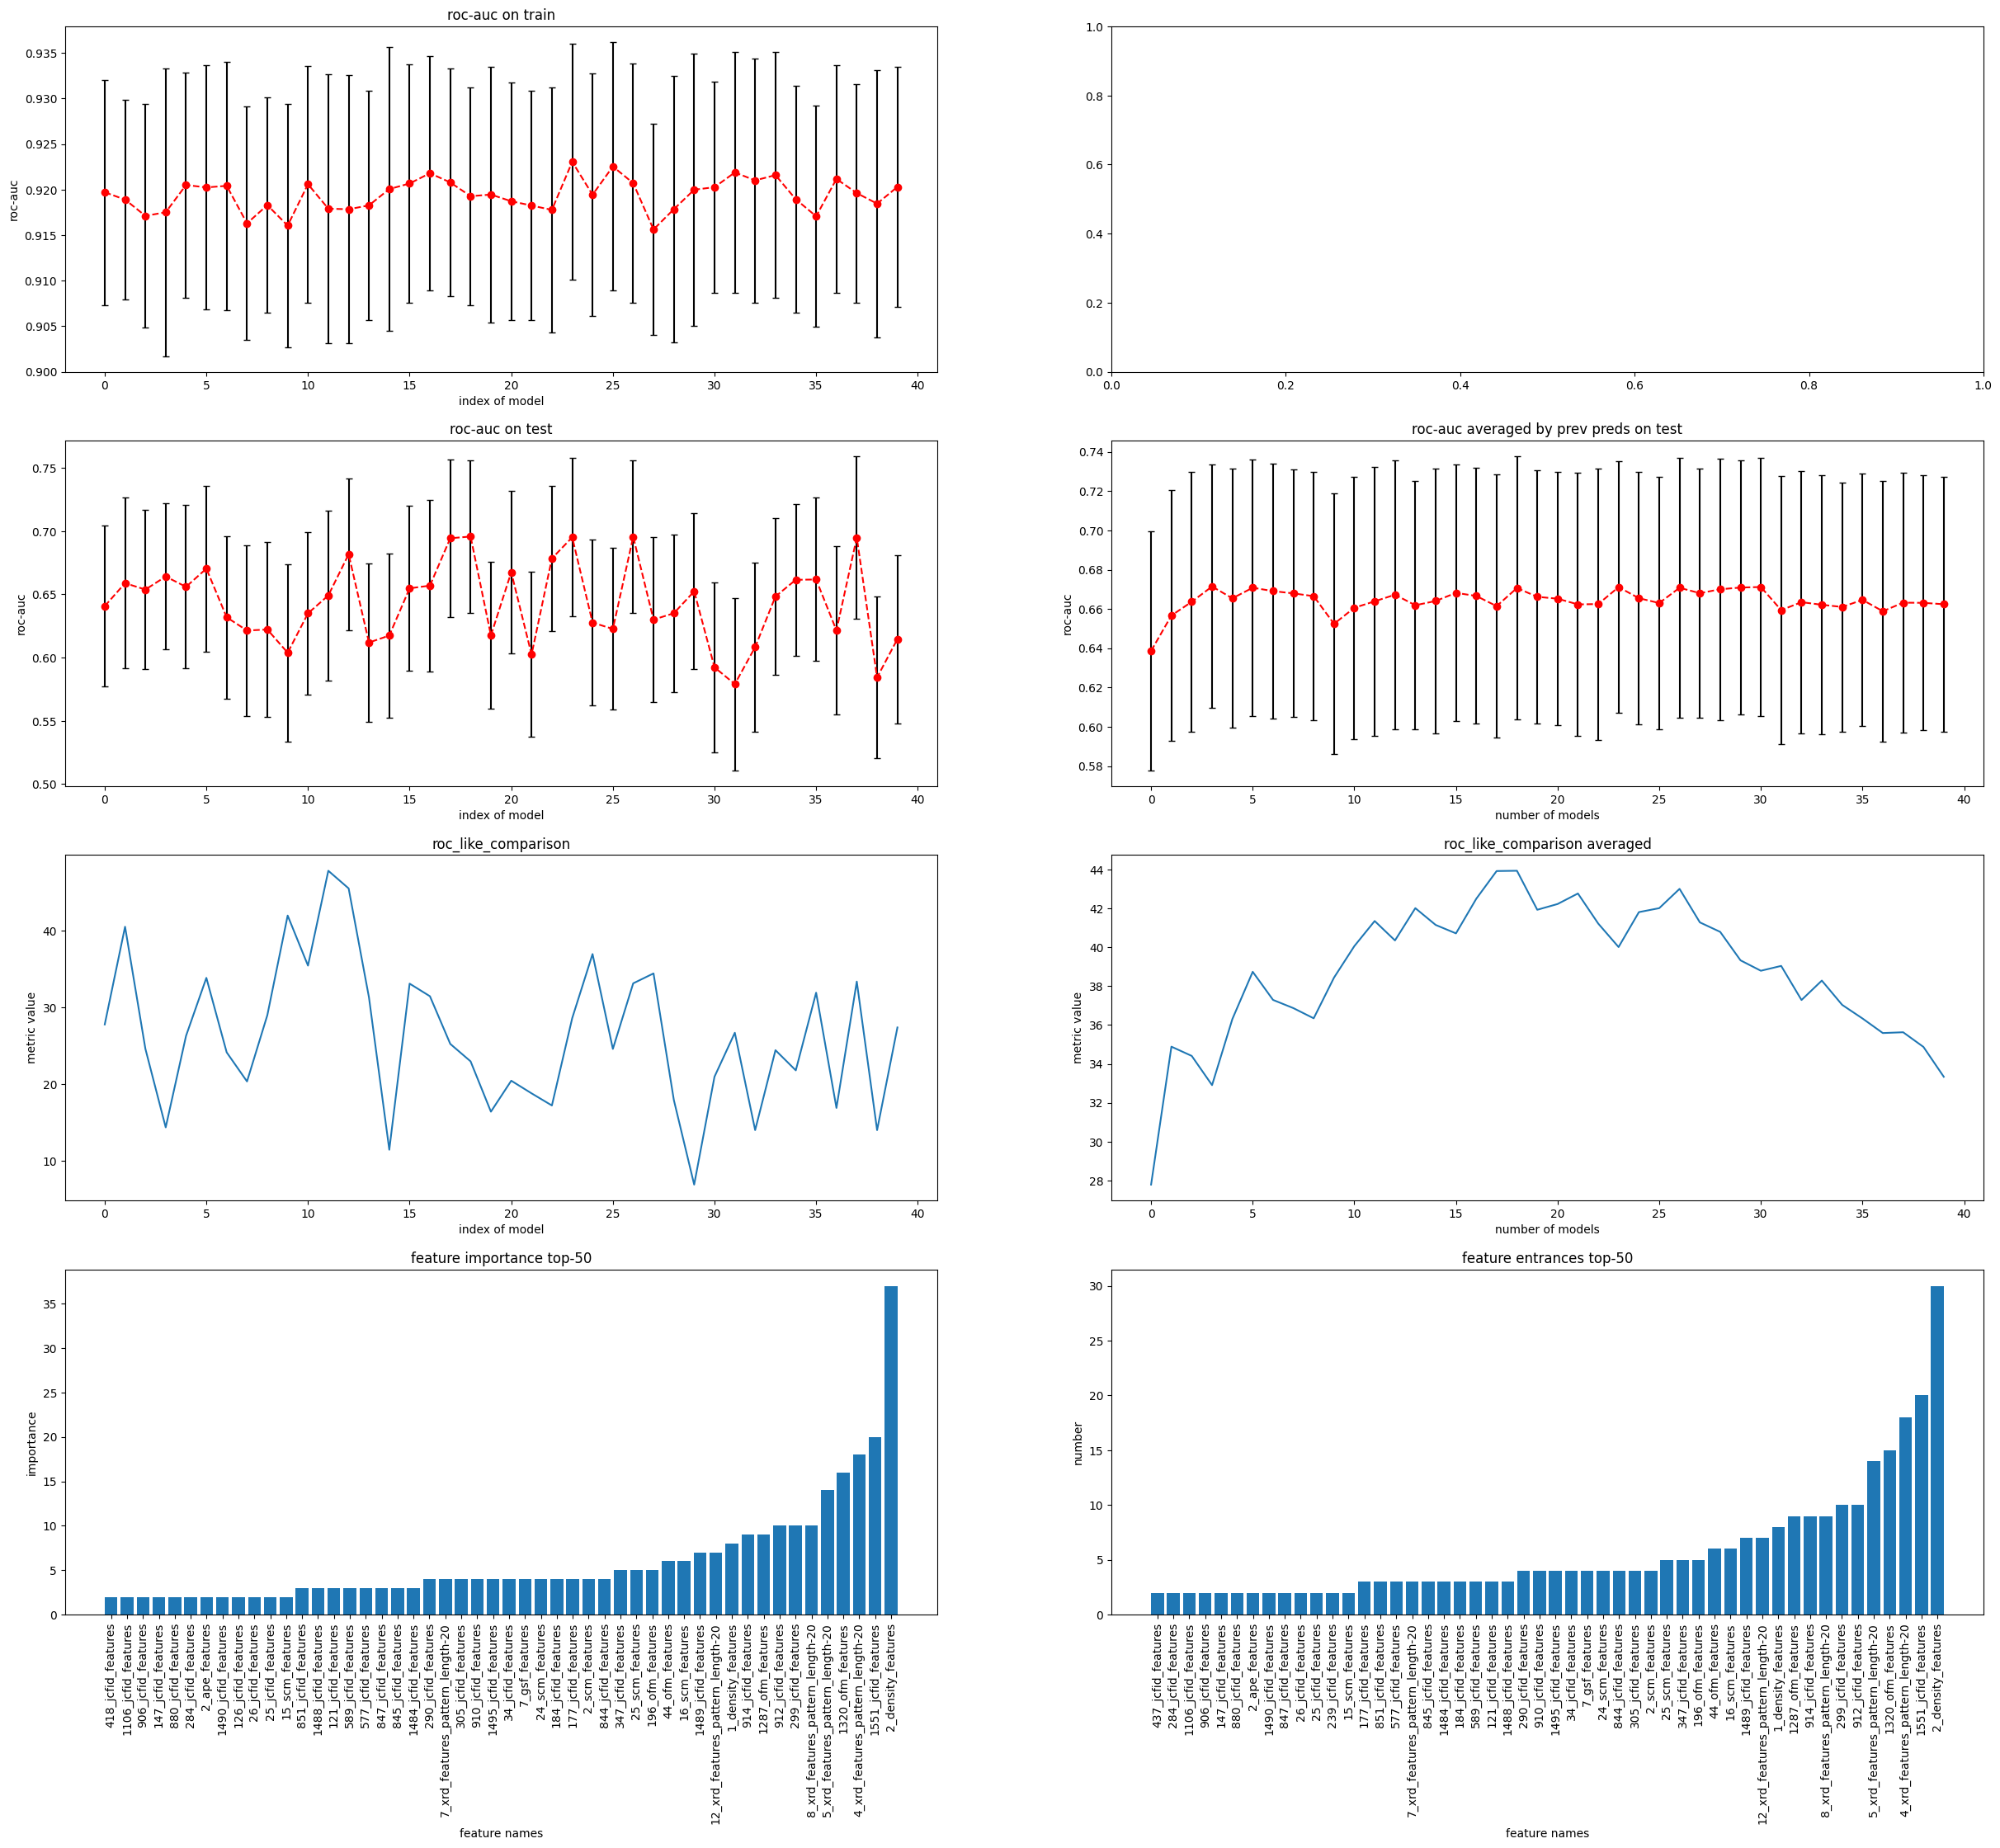

In [18]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, all_preds, y)

In [20]:
print(f'roc_like_comparison: {roc_like_comparison_averaged[-1]}, roc_auc on test {roc_auc_averaged[-1][0]}, mean train roc-auc {np.array(train_roc_auc)[:, 0].mean()}')

roc_like_comparison: 33.33559681549342, roc_auc on test 0.6623921999403793, mean train roc-auc 0.9193972425765671


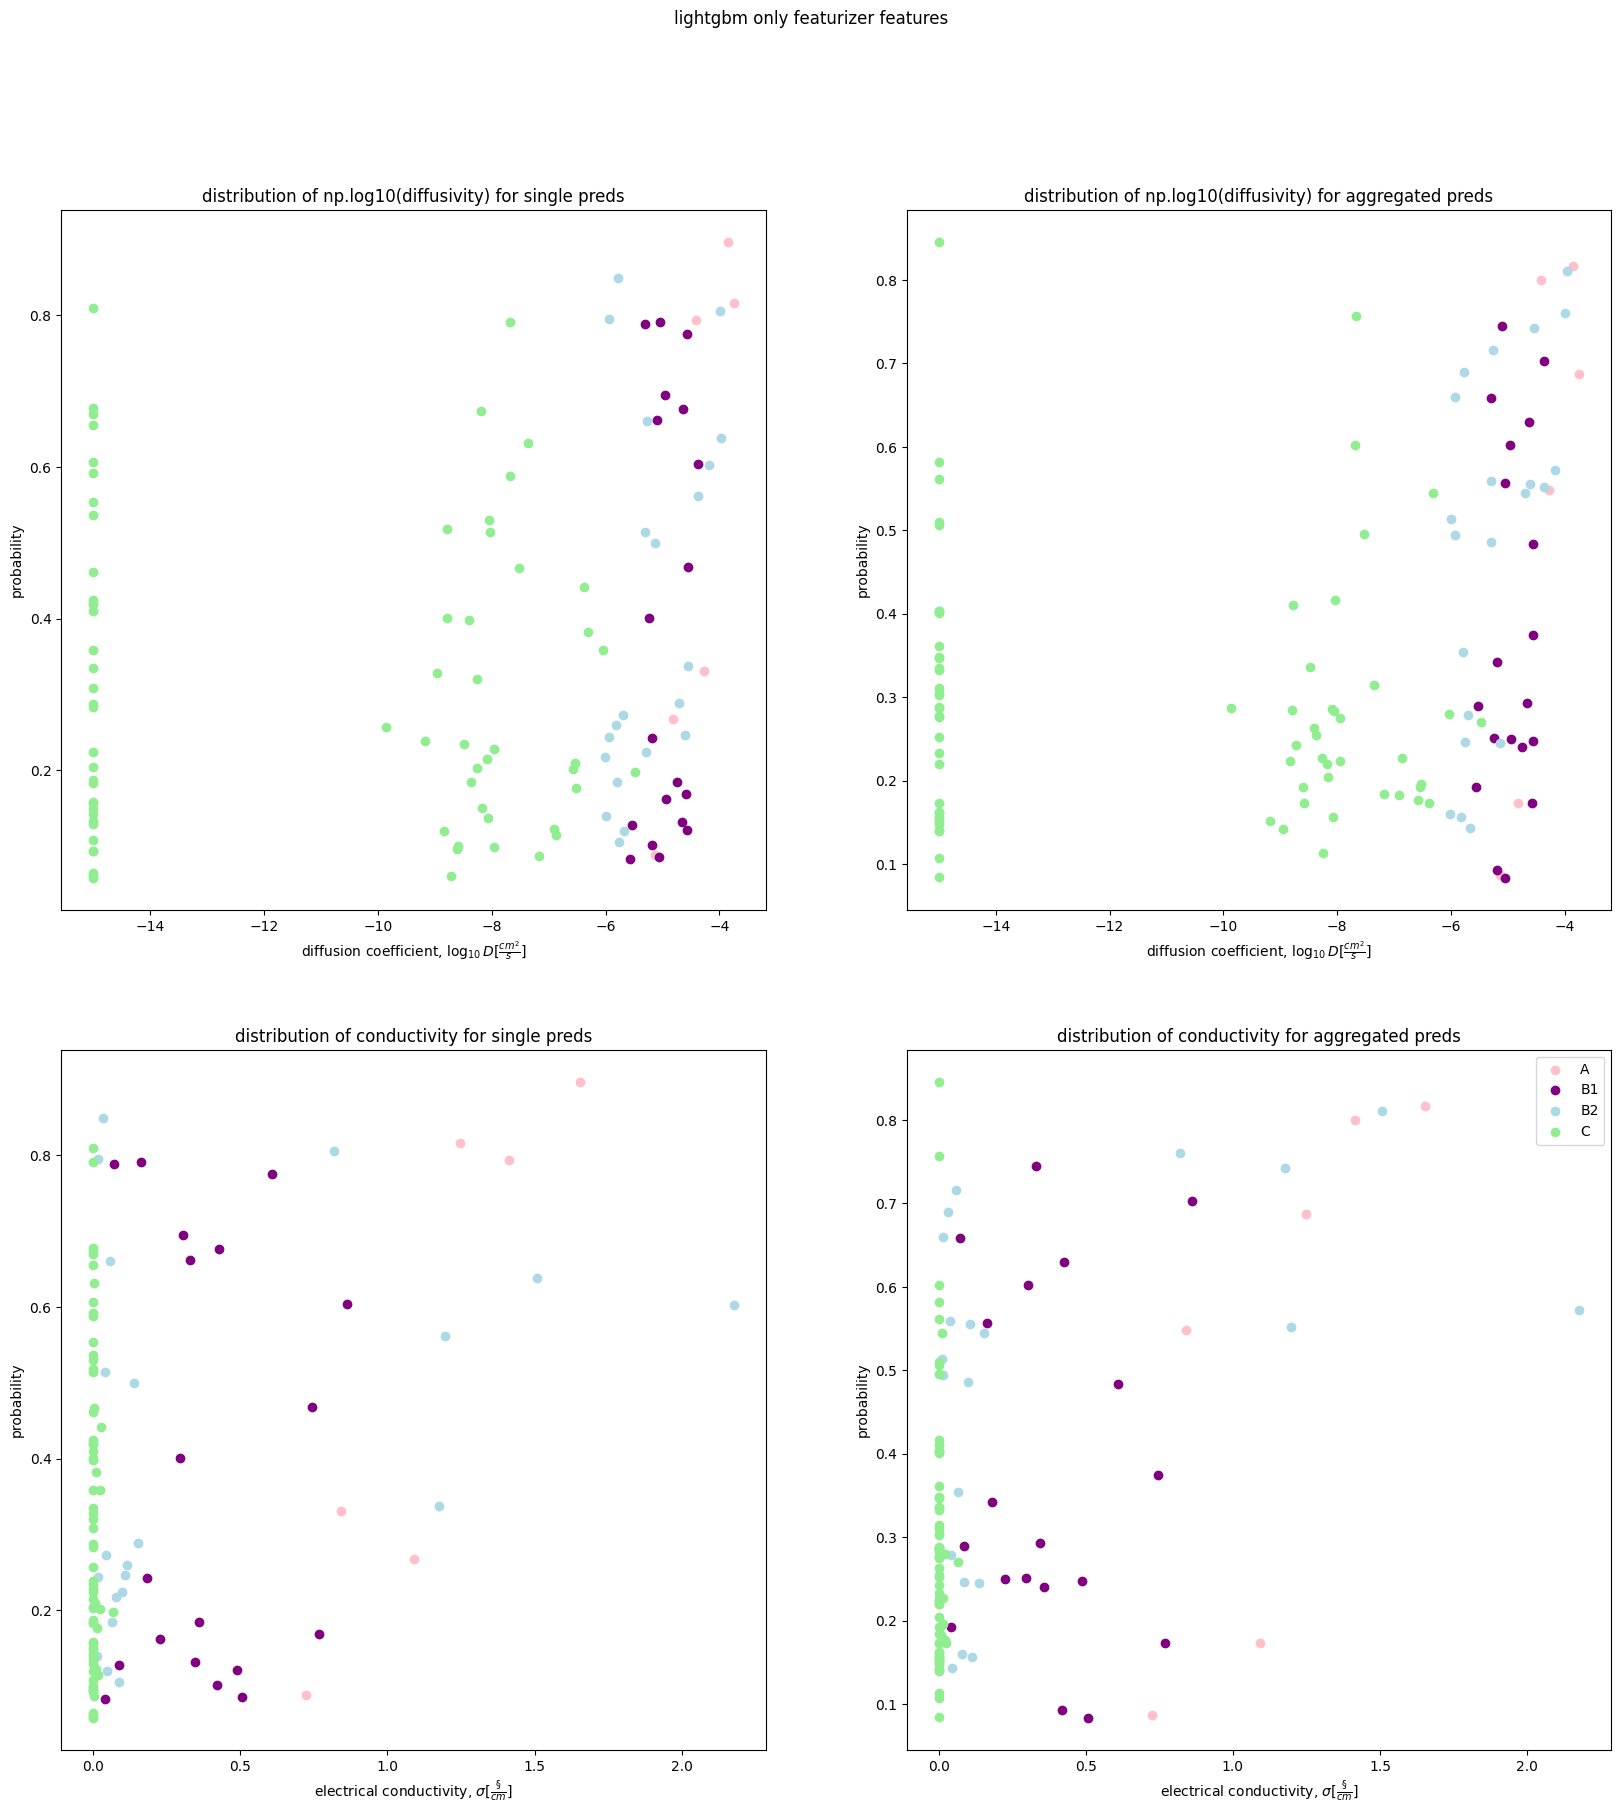

In [21]:
plot_distribution_compared(
        df_kahle_fin,
        all_preds[0],
        np.array(all_preds).sum(axis = 0) / len(all_preds), 
        'lightgbm only featurizer features'
        )

In [ ]:
np.savetxt('predictions/lightgbm_only_featurizer_features', np.array(all_preds).sum(axis = 0) / len(all_preds))

In [37]:
def plot_diffusion_distribution(df, axs, preds, i, j, title):

    df['preds'] = preds

    A = df[df['group'] == 'A']
    B1 = df[df['group'] == 'B1']
    B2 = df[df['group'] == 'B2']
    C = df[df['group'] == 'C']


    axs[i, j].scatter(np.log10(A['diffusion_mean_cm2_s']).to_list(), A['preds'].to_list(), label='A', c = 'pink')
    axs[i, j].scatter(np.log10(B1['diffusion_mean_cm2_s']).to_list(), B1['preds'].to_list(), label='B1', c = 'purple')
    axs[i, j].scatter(np.log10(B2['diffusion_mean_cm2_s']).to_list(), B2['preds'].to_list(), label='B2', c = 'lightblue')
    axs[i, j].scatter(np.log10(C['diffusion_mean_cm2_s']).to_list(), C['preds'].to_list(), label='C', c = 'lightgreen')

    axs[i, j].set_ylabel('probability')
    axs[i, j].set_xlabel('diffusion coefficient, $\log_{10}D[\\frac{cm^2}{s}]$')

    axs[i, j].set_title(title)

  2%|▏         | 2/116 [00:00<00:22,  5.13it/s]

roc-auc on train for 0 fold with size 118: 0.7982797792924375


100%|██████████| 116/116 [00:23<00:00,  4.98it/s]


test roc-auc mean: 0.37396663758468, std: 0.06075013247189934
mean train roc-auc: 0.8053617866051278


  2%|▏         | 2/116 [00:00<00:22,  5.06it/s]

roc-auc on train for 0 fold with size 118: 0.9021421616358325


100%|██████████| 116/116 [00:23<00:00,  4.95it/s]


test roc-auc mean: 0.5147154728934197, std: 0.06008715720775274
mean train roc-auc: 0.9149359368290282


  2%|▏         | 2/116 [00:00<00:22,  5.10it/s]

roc-auc on train for 0 fold with size 118: 0.9415774099318402


100%|██████████| 116/116 [00:24<00:00,  4.82it/s]


test roc-auc mean: 0.4894660940693491, std: 0.059343870920433285
mean train roc-auc: 0.9448793099398513


  1%|          | 1/116 [00:00<00:23,  4.82it/s]

roc-auc on train for 0 fold with size 118: 0.9542356377799416


100%|██████████| 116/116 [00:23<00:00,  4.83it/s]


test roc-auc mean: 0.4494775371911489, std: 0.06127745946233782
mean train roc-auc: 0.9592502590742629


  1%|          | 1/116 [00:00<00:23,  4.95it/s]

roc-auc on train for 0 fold with size 118: 0.9649464459591042


100%|██████████| 116/116 [00:24<00:00,  4.73it/s]


test roc-auc mean: 0.4218307580981874, std: 0.05865072901712514
mean train roc-auc: 0.9678617161945087


  1%|          | 1/116 [00:00<00:25,  4.53it/s]

roc-auc on train for 0 fold with size 118: 0.9649464459591042


100%|██████████| 116/116 [00:24<00:00,  4.77it/s]


test roc-auc mean: 0.41584909290404576, std: 0.05770966803104253
mean train roc-auc: 0.972721333802811


  1%|          | 1/116 [00:00<00:22,  5.01it/s]

roc-auc on train for 0 fold with size 118: 0.9694904251866278


100%|██████████| 116/116 [00:23<00:00,  4.85it/s]


test roc-auc mean: 0.41255966809459255, std: 0.060325950196029626
mean train roc-auc: 0.9762819141424137


  2%|▏         | 2/116 [00:00<00:22,  4.96it/s]

roc-auc on train for 0 fold with size 118: 0.9759818240830899


100%|██████████| 116/116 [00:23<00:00,  4.84it/s]


test roc-auc mean: 0.41442197803324876, std: 0.05963832416029549
mean train roc-auc: 0.9796763060921367


  1%|          | 1/116 [00:00<00:27,  4.22it/s]

roc-auc on train for 0 fold with size 118: 0.970139565076274


100%|██████████| 116/116 [00:24<00:00,  4.81it/s]


test roc-auc mean: 0.41868501094736066, std: 0.061481291512248556
mean train roc-auc: 0.9809009418860754


100%|██████████| 100/100 [00:00<00:00, 624.33it/s]


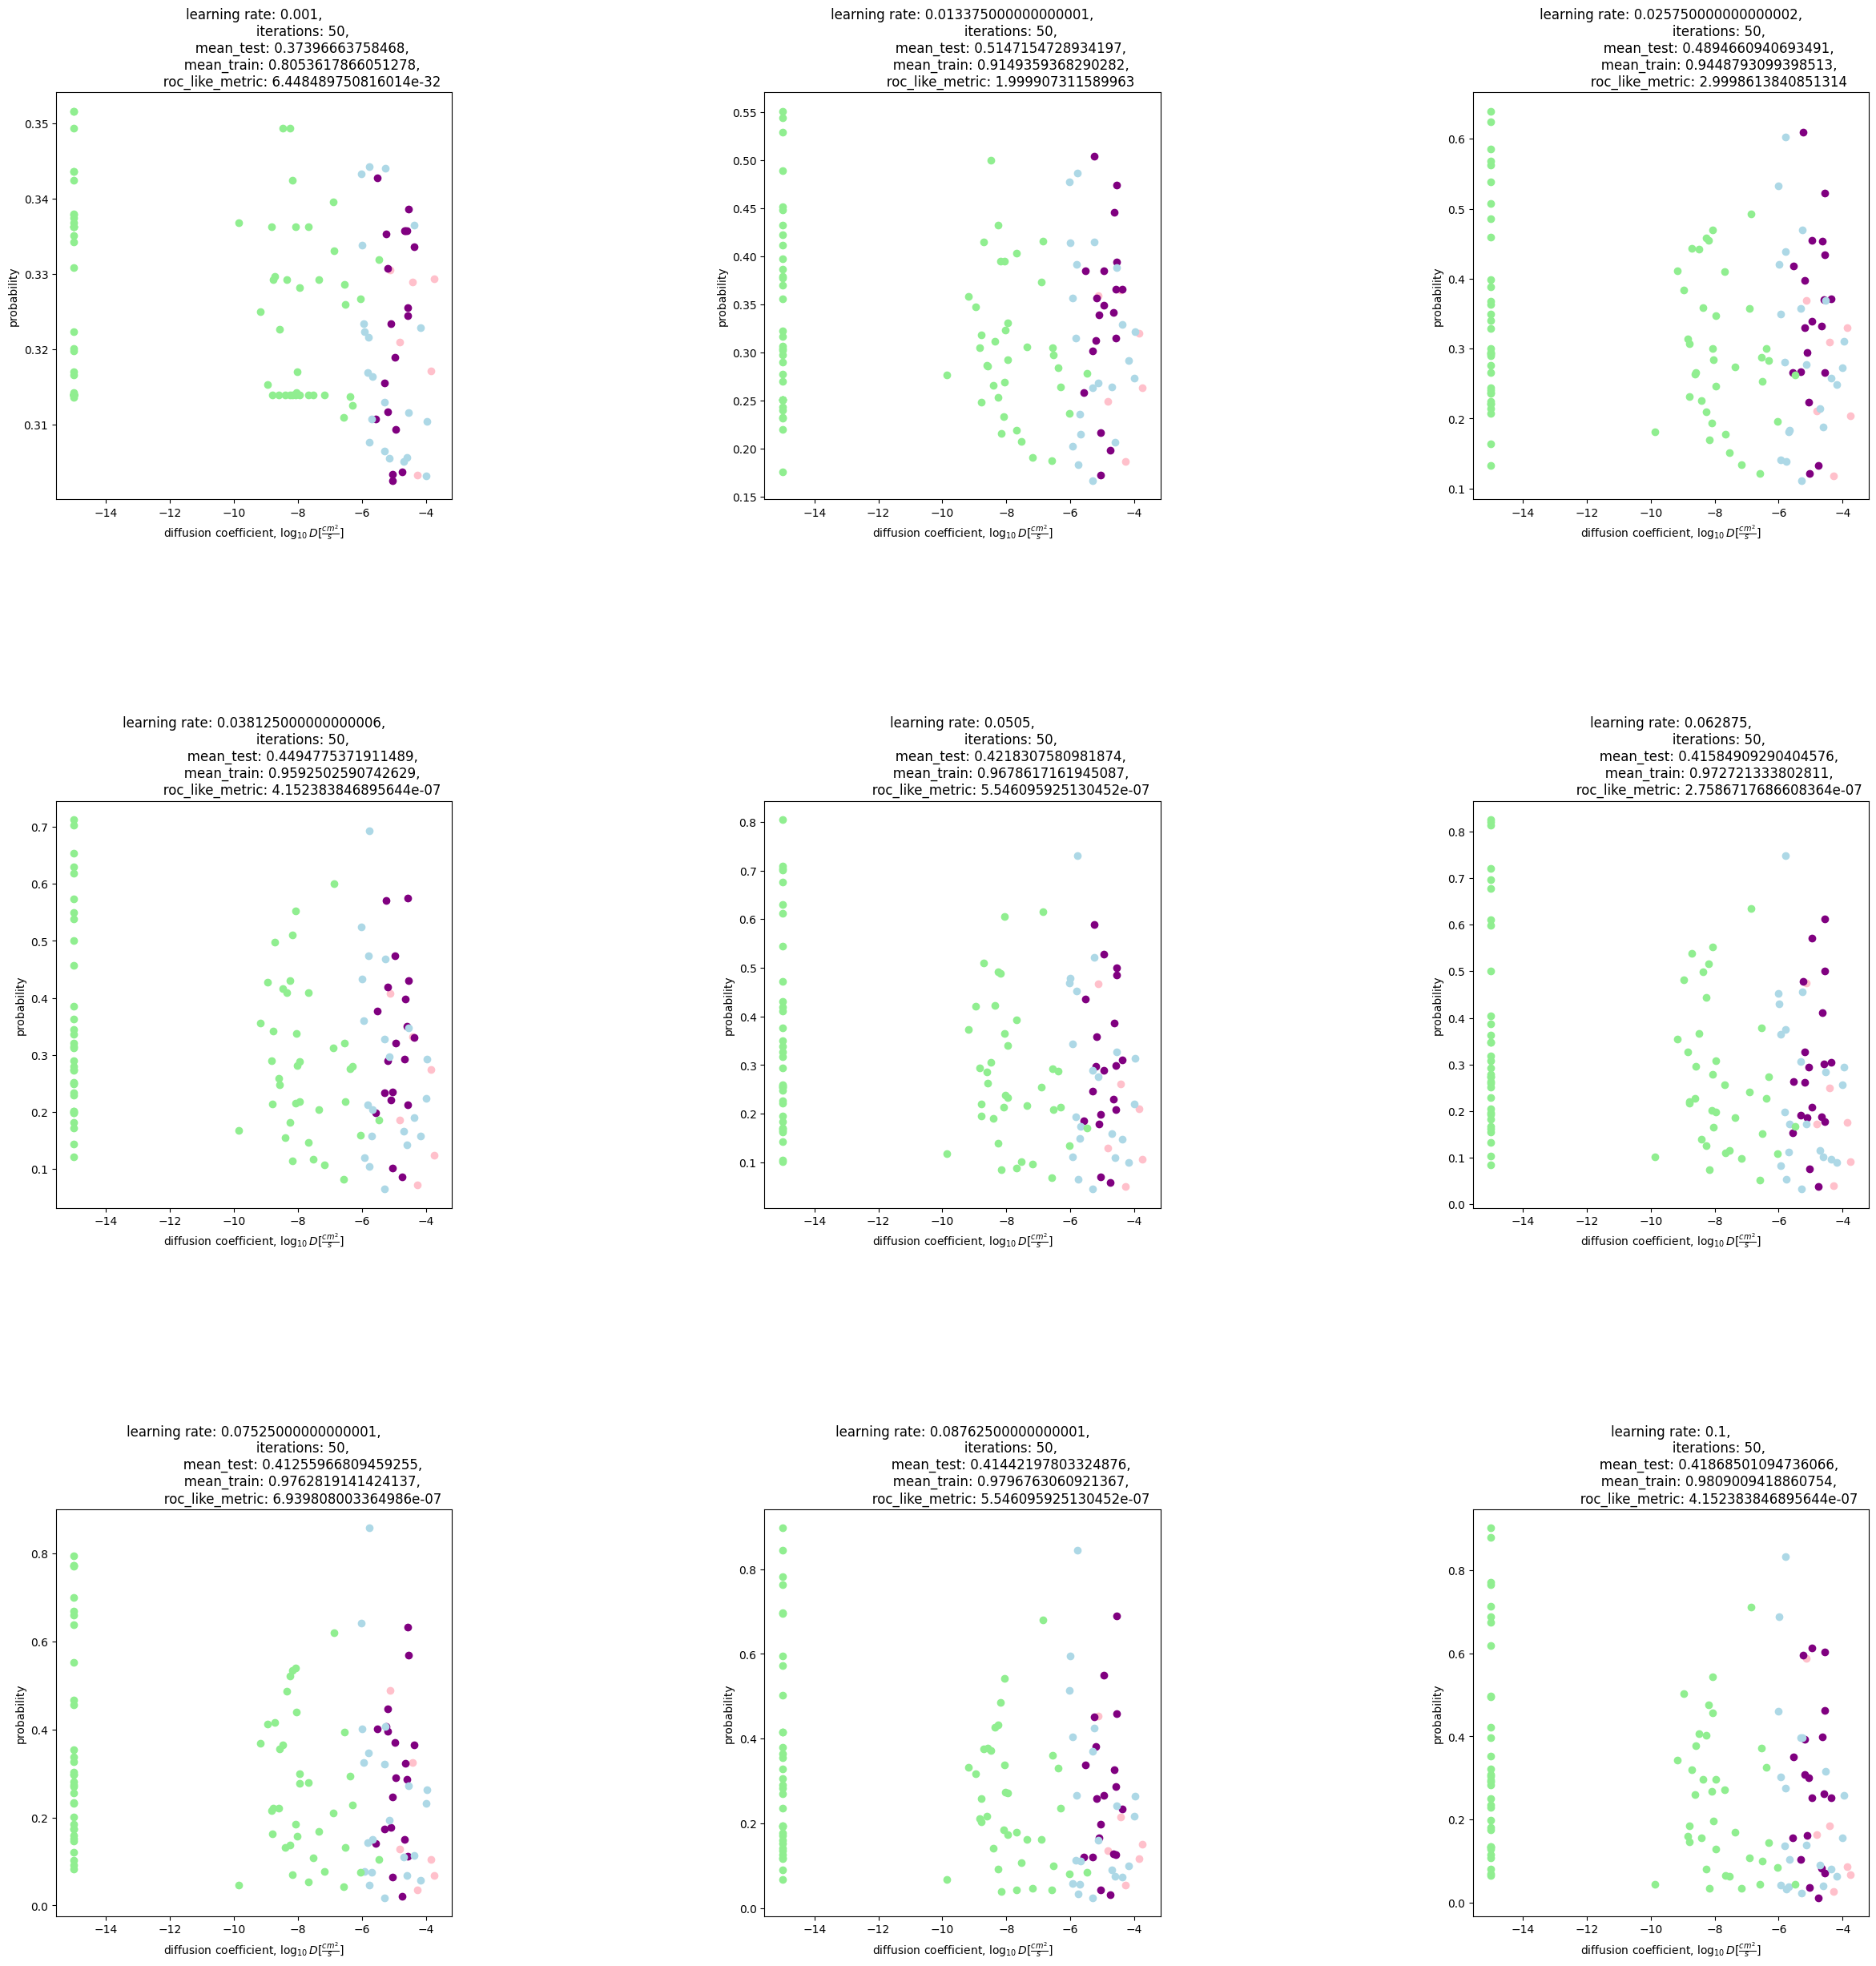

In [58]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
fig.tight_layout(pad=25.0)


params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "max_depth": 3,
        "n_estimators": 50,
        "verbosity" : -1,
    }

for i, learning_rate in enumerate(np.linspace(0.001, 0.1, 9)):
    model_class = LGBMClassifier(**params, seed = rs, bagging_seed = rs, learning_rate = learning_rate, feature_weights = feature_weights)
    # model_class = CatBoostClassifier(eval_metric='AUC', verbose = False, random_state = rs, iterations = 50, max_depth = 3, learning_rate = learning_rate, feature_weights = feature_weights)
    preds, model, mean_test, std_test, mean_train, std_train = train_loop(df_kahle_fin, X, y, model_class, threshold = 1e-2, model_name = 'lightgbm')

    roc_like_metrics = calculate_ROClikeComparisonMetrics(df_kahle_fin, preds)['score']['preds']

    plot_diffusion_distribution(df_kahle_fin, axs, preds, i // 3, i % 3, 
                      f'learning rate: {learning_rate},\n \
                      iterations: {50},\n \
                      mean_test: {mean_test},\n \
                      mean_train: {mean_train},\n \
                      roc_like_metric: {roc_like_metrics}')
    

In [24]:
def get_nn_features():
    df_barrier_features_kahle = pd.read_csv('barrier_features/exported.predictions.Kahle2020.v2.csv')

    barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
    union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
    df_barrier_features_kahle = df_barrier_features_kahle[barrier_robust_0p_features + union_features + ['src_id', 'diffusion_mean_cm2_s', 'starting_structure']]

    kahle = pd.read_csv('kahle.csv')
    df_kahle_fin = df_kahle_fin.merge(kahle, left_on = ['src_id', 'diffusion_mean_cm2_s'], right_on = ['src_id', 'diffusion_mean_cm2_s'])
    df_kahle_fin = dataset_preprocessing(df_kahle_fin, 'structure')


In [25]:
df_barrier_features_kahle = pd.read_csv('barrier_features/exported.predictions.Kahle2020.v2.csv')


barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
df_barrier_features_kahle = df_barrier_features_kahle[barrier_robust_0p_features + union_features + ['src_id', 'diffusion_mean_cm2_s', 'starting_structure']]


In [29]:
df_barrier_features_kahle = pd.read_csv('barrier_features/exported.predictions.Kahle2020.v2.csv')
df_barrier_features_kahle

,starting_structure,src_database,src_id,diffusion_mean_cm2_s,cell_volume,fv_0p1_disconnected,fv_0p1_disconnected_rel,fv_0p1_connected,fv_0p1_connected_rel,fv_0p1_WARNlowPES,...,masked1p5_fv_4p0_disconnected,masked1p5_fv_4p0_disconnected_rel,masked1p5_fv_4p0_connected,masked1p5_fv_4p0_connected_rel,masked1p5_fv_4p0_disconnected_union,masked1p5_fv_4p0_connected_union,barrier,barrier_robust_0p03,barrier_robust_0p05,barrier_robust_0p10
0,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,28526,-2.187742e-08,152.883759,0.000628,0.000004,0.000079,5.137129e-07,False,...,0.217268,0.001421,0.104972,0.000687,0.214720,0.103741,0.939171,0.964828,1.425787,3.600920
1,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,188009,2.782071e-05,556.417422,0.002484,0.000004,0.000310,5.579579e-07,False,...,2.288342,0.004113,2.288342,0.004113,0.448751,0.448751,0.689148,1.640167,1.640167,1.812030
2,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,73275,6.590674e-05,337.650435,0.007831,0.000023,0.000979,2.899008e-06,False,...,1.559292,0.004618,1.537905,0.004555,0.493330,0.491084,0.764454,2.166511,3.557329,3.801105
3,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,50612,-4.211661e-09,337.277767,0.001779,0.000005,0.000222,6.593872e-07,False,...,1.018905,0.003021,0.298489,0.000885,0.370481,0.175113,2.137192,3.337216,3.953751,3.961853
4,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,75516,-9.801221e-09,311.353269,0.002447,0.000008,0.000306,9.824779e-07,False,...,0.442203,0.001420,0.043202,0.000139,0.202747,0.034030,3.880043,4.325317,5.840614,5.840614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,"{""@module"": ""pymatgen.core.structure"", ""@class...",Crystallography Open Database,7031897,9.147973e-07,1284.612823,0.001604,0.000001,0.000201,1.561187e-07,False,...,3.875873,0.003017,3.875447,0.003017,0.425660,0.425619,1.978455,2.393066,2.393066,2.648499
117,"{""@module"": ""pymatgen.core.structure"", ""@class...",NaN,-1,3.793340e-05,997.651693,0.014182,0.000014,0.001768,1.771942e-06,False,...,5.927877,0.005942,5.919635,0.005934,0.540963,0.540747,0.811508,0.835114,0.886963,1.227252
118,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,642182,1.378083e-10,822.833096,0.003386,0.000004,0.000423,5.143908e-07,False,...,2.299267,0.002794,0.047790,0.000058,0.476811,0.020117,8.536957,17.164917,17.164917,17.164917
119,"{""@module"": ""pymatgen.core.structure"", ""@class...",Icsd,75071,2.108916e-08,687.510402,0.001062,0.000002,0.000133,1.930635e-07,False,...,0.735786,0.001070,0.735786,0.001070,0.387603,0.387603,1.132355,1.149750,1.187856,1.195450


In [28]:
kahle = pd.read_csv('kahle.csv')
kahle

,stru_label,stru_id,structure,group,diffusion_mean_cm2_s,label,src_id,diffusion_sem_cm2_s
0,Li24Al8N16,1537475,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_C,1.473662e-09,Li24Al8N16,1537475,3.669924e-09
1,Li12W2N8,153620,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_C,1.104319e-09,Li12W2N8,153620,6.277877e-09
2,CsLi2I3,245988,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_A,5.288627e-05,CsLi2I3,245988,5.093144e-06
3,Li12Mo6O24,7024042,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_C,-3.460732e-08,Li12Mo6O24,7024042,5.281177e-10
4,Li4B4O8,2310701,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_C,-4.483907e-08,Li4B4O8,2310701,6.273645e-08
...,...,...,...,...,...,...,...,...
111,Li8Al4B20O40,2012178,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_C,4.901367e-07,Li8Al4B20O40,2012178,2.950732e-07
112,Li4Au4F16,33953,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_E,2.123316e-06,Li4Au4F16,33953,2.104923e-06
113,Li4B4S10,1510745,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_B,4.276523e-05,Li4B4S10,1510745,9.476761e-06
114,Li4I4O16,1536985,"{""@module"": ""pymatgen.core.structure"", ""@class...",group_E,5.063438e-06,Li4I4O16,1536985,1.534500e-06


In [26]:
df_barrier_features_kahle

,barrier_robust_0p03,barrier_robust_0p05,barrier_robust_0p10,fv_0p1_disconnected_union,fv_0p1_connected_union,fv_0p2_disconnected_union,fv_0p2_connected_union,fv_0p3_disconnected_union,fv_0p3_connected_union,fv_0p4_disconnected_union,...,fv_2p5_connected_union,fv_3p0_disconnected_union,fv_3p0_connected_union,fv_3p5_disconnected_union,fv_3p5_connected_union,fv_4p0_disconnected_union,fv_4p0_connected_union,src_id,diffusion_mean_cm2_s,starting_structure
0,0.964828,1.425787,3.600920,0.000628,0.000079,0.001852,0.000231,0.003555,0.000444,0.005754,...,0.062411,0.170106,0.085053,0.196429,0.098214,0.221958,0.110979,28526,-2.187742e-08,"{""@module"": ""pymatgen.core.structure"", ""@class..."
1,1.640167,1.640167,1.812030,0.002484,0.000310,0.006280,0.000785,0.011721,0.001465,0.020866,...,0.241682,0.409423,0.291324,0.436215,0.433653,0.464450,0.464450,188009,2.782071e-05,"{""@module"": ""pymatgen.core.structure"", ""@class..."
2,2.166511,3.557329,3.801105,0.007831,0.000979,0.014423,0.001803,0.028796,0.003505,0.035724,...,0.116276,0.442145,0.135392,0.481177,0.154502,0.521692,0.519445,73275,6.590674e-05,"{""@module"": ""pymatgen.core.structure"", ""@class..."
3,3.337216,3.953751,3.961853,0.001779,0.000222,0.004605,0.000576,0.008181,0.001023,0.013222,...,0.057118,0.321010,0.098033,0.362262,0.127993,0.394209,0.200334,50612,-4.211661e-09,"{""@module"": ""pymatgen.core.structure"", ""@class..."
4,4.325317,5.840614,5.840614,0.002447,0.000306,0.005971,0.000746,0.010221,0.001278,0.014447,...,0.020752,0.172184,0.026218,0.196990,0.031949,0.221527,0.053995,75516,-9.801221e-09,"{""@module"": ""pymatgen.core.structure"", ""@class..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2.393066,2.393066,2.648499,0.001604,0.000201,0.004442,0.000555,0.008290,0.001036,0.012960,...,0.099858,0.363275,0.307073,0.407665,0.395756,0.439751,0.439710,7031897,9.147973e-07,"{""@module"": ""pymatgen.core.structure"", ""@class..."
117,0.835114,0.886963,1.227252,0.014182,0.001768,0.037479,0.004601,0.075864,0.009889,0.118214,...,0.466377,0.513636,0.510435,0.543578,0.542254,0.568660,0.568444,-1,3.793340e-05,"{""@module"": ""pymatgen.core.structure"", ""@class..."
118,17.164917,17.164917,17.164917,0.003386,0.000423,0.009127,0.001141,0.016143,0.002018,0.024122,...,0.045222,0.424052,0.056829,0.482199,0.067049,0.530814,0.076709,642182,1.378083e-10,"{""@module"": ""pymatgen.core.structure"", ""@class..."
119,1.149750,1.187856,1.195450,0.001062,0.000133,0.003658,0.000456,0.007873,0.000979,0.014241,...,0.268300,0.316088,0.316074,0.356840,0.356840,0.391434,0.391434,75071,2.108916e-08,"{""@module"": ""pymatgen.core.structure"", ""@class..."


In [3]:
def get_nn_features():
    df_barrier_features_kahle = pd.read_csv('barrier_features/exported.predictions.Kahle2020.v2.csv')

    barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
    union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
    df_barrier_features_kahle = df_barrier_features_kahle[barrier_robust_0p_features + union_features + ['src_id', 'diffusion_mean_cm2_s']]

    kahle = pd.read_csv('kahle.csv')
    df_kahle_fin = df_barrier_features_kahle.merge(kahle, left_on = ['src_id', 'diffusion_mean_cm2_s'], right_on = ['src_id', 'diffusion_mean_cm2_s'])
    df_kahle_fin = dataset_preprocessing(df_kahle_fin, 'structure')



In [11]:
df_barrier_features_kahle = pd.read_csv('barrier_features/exported.predictions.Kahle2020.v2.csv')

barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
df_barrier_features_kahle = df_barrier_features_kahle[barrier_robust_0p_features + union_features + ['src_id', 'diffusion_mean_cm2_s']]

kahle = pd.read_csv('kahle.csv')
df_kahle_fin = df_barrier_features_kahle.merge(kahle, left_on = ['src_id', 'diffusion_mean_cm2_s'], right_on = ['src_id', 'diffusion_mean_cm2_s'])
df_kahle_fin = dataset_preprocessing(df_kahle_fin, 'structure')


In [12]:
df_kahle_fin

,barrier_robust_0p03,barrier_robust_0p05,barrier_robust_0p10,fv_0p1_disconnected_union,fv_0p1_connected_union,fv_0p2_disconnected_union,fv_0p2_connected_union,fv_0p3_disconnected_union,fv_0p3_connected_union,fv_0p4_disconnected_union,...,stru_label,stru_id,structure,group,label,diffusion_sem_cm2_s,n_Li,sigma_S_cm,sigma_S_cm_sem,sigma_S_cm_err
0,0.964828,1.425787,3.600920,0.000628,0.000079,0.001852,0.000231,0.003555,0.000444,0.005754,...,LiYMo3O8,28526,"[[3.6670761 5.30816615 6.77627803] Li, [5.833...",C,LiYMo3O8,2.378833e-08,0.006541,1.216120e-11,0.000289,0.000289
1,1.640167,1.640167,1.812030,0.002484,0.000310,0.006280,0.000785,0.011721,0.001465,0.020866,...,Li8S8O28,188009,"[[-8.08552354 -4.75263534 -0.49674138] Li, [-1...",B1,Li8S8O28,2.775957e-06,0.014378,7.436953e-01,0.074206,0.074206
2,2.166511,3.557329,3.801105,0.007831,0.000979,0.014423,0.001803,0.028796,0.003505,0.035724,...,Li6MgBr8,73275,"[[1.95388526 1.94253826 8.2893314 ] Li, [5.862...",B2,Li6MgBr8,2.305532e-06,0.017770,2.177466e+00,0.076172,0.076172
3,3.337216,3.953751,3.961853,0.001779,0.000222,0.004605,0.000576,0.008181,0.001023,0.013222,...,Li8Al4B4O16,50612,"[[-0.80267286 -4.21442646 -5.89709589] Li, [-3...",C,Li8Al4B4O16,9.275417e-09,0.023719,4.410014e-11,0.000409,0.000409
4,4.325317,5.840614,5.840614,0.002447,0.000306,0.005971,0.000746,0.010221,0.001278,0.014447,...,Ba4Li6Nb2N8,75516,"[[ 4.25458214 -6.3359703 2.4003216 ] Li, [ 1...",C,Ba4Li6Nb2N8,1.050883e-08,0.019271,3.582906e-11,0.000377,0.000377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2.393066,2.393066,2.648499,0.001604,0.000201,0.004442,0.000555,0.008290,0.001036,0.012960,...,Li16B24P8O64,7031897,"[[0.94296368 3.38170831 9.72678919] Li, [7.760...",C,Li16B24P8O64,2.913129e-07,0.012455,2.118411e-02,0.006746,0.006746
112,0.835114,0.886963,1.227252,0.014182,0.001768,0.037479,0.004601,0.075864,0.009889,0.118214,...,Li20Ge2P4S24,-1,"[[3.06810546 2.61107595 3.21901705] Li, [6.545...",A,Li20Ge2P4S24,4.398439e-06,0.020047,1.413873e+00,0.163941,0.163941
113,17.164917,17.164917,17.164917,0.003386,0.000423,0.009127,0.001141,0.016143,0.002018,0.024122,...,Li56P8N32,642182,"[[9.3663704 0.01358423 4.69976719] Li, [9.366...",C,Li56P8N32,4.584305e-09,0.068058,1.743771e-05,0.000580,0.000580
114,1.149750,1.187856,1.195450,0.001062,0.000133,0.003658,0.000456,0.007873,0.000979,0.014241,...,Li2Nb6In2Cl18,75071,"[[ 5.2677564 -0.53206684 1.50905034] Li, [0....",C,Li2Nb6In2Cl18,1.488374e-07,0.002909,1.140638e-04,0.000805,0.000805


In [122]:
X = df_kahle_fin.drop([ 
    'src_id',
     'diffusion_mean_cm2_s', 
     'starting_structure', 
     'diffusion_sem_cm2_s', 
     'temperature', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err',
     'stru_label', 
     'stru_id', 
     'group',
     'structure', 
     'label'
 ], axis=1)


feature_names = X.columns.tolist()


feature_names = np.array(feature_names)[~np.all(X.to_numpy() == 0, axis=0)]
X = X.to_numpy()
X = X[:, ~np.all(X == 0, axis=0)]

In [ ]:
params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "max_depth": 3,
        "learning_rate" : 0.9,
        "n_estimators": 3,
        "verbosity" : -1,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, all_preds, feature_importance, feature_entarances, y = evaluate_parameters(params, X, df_kahle_fin, feature_weights = np.ones(X.shape[1]), thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'lightgbm')

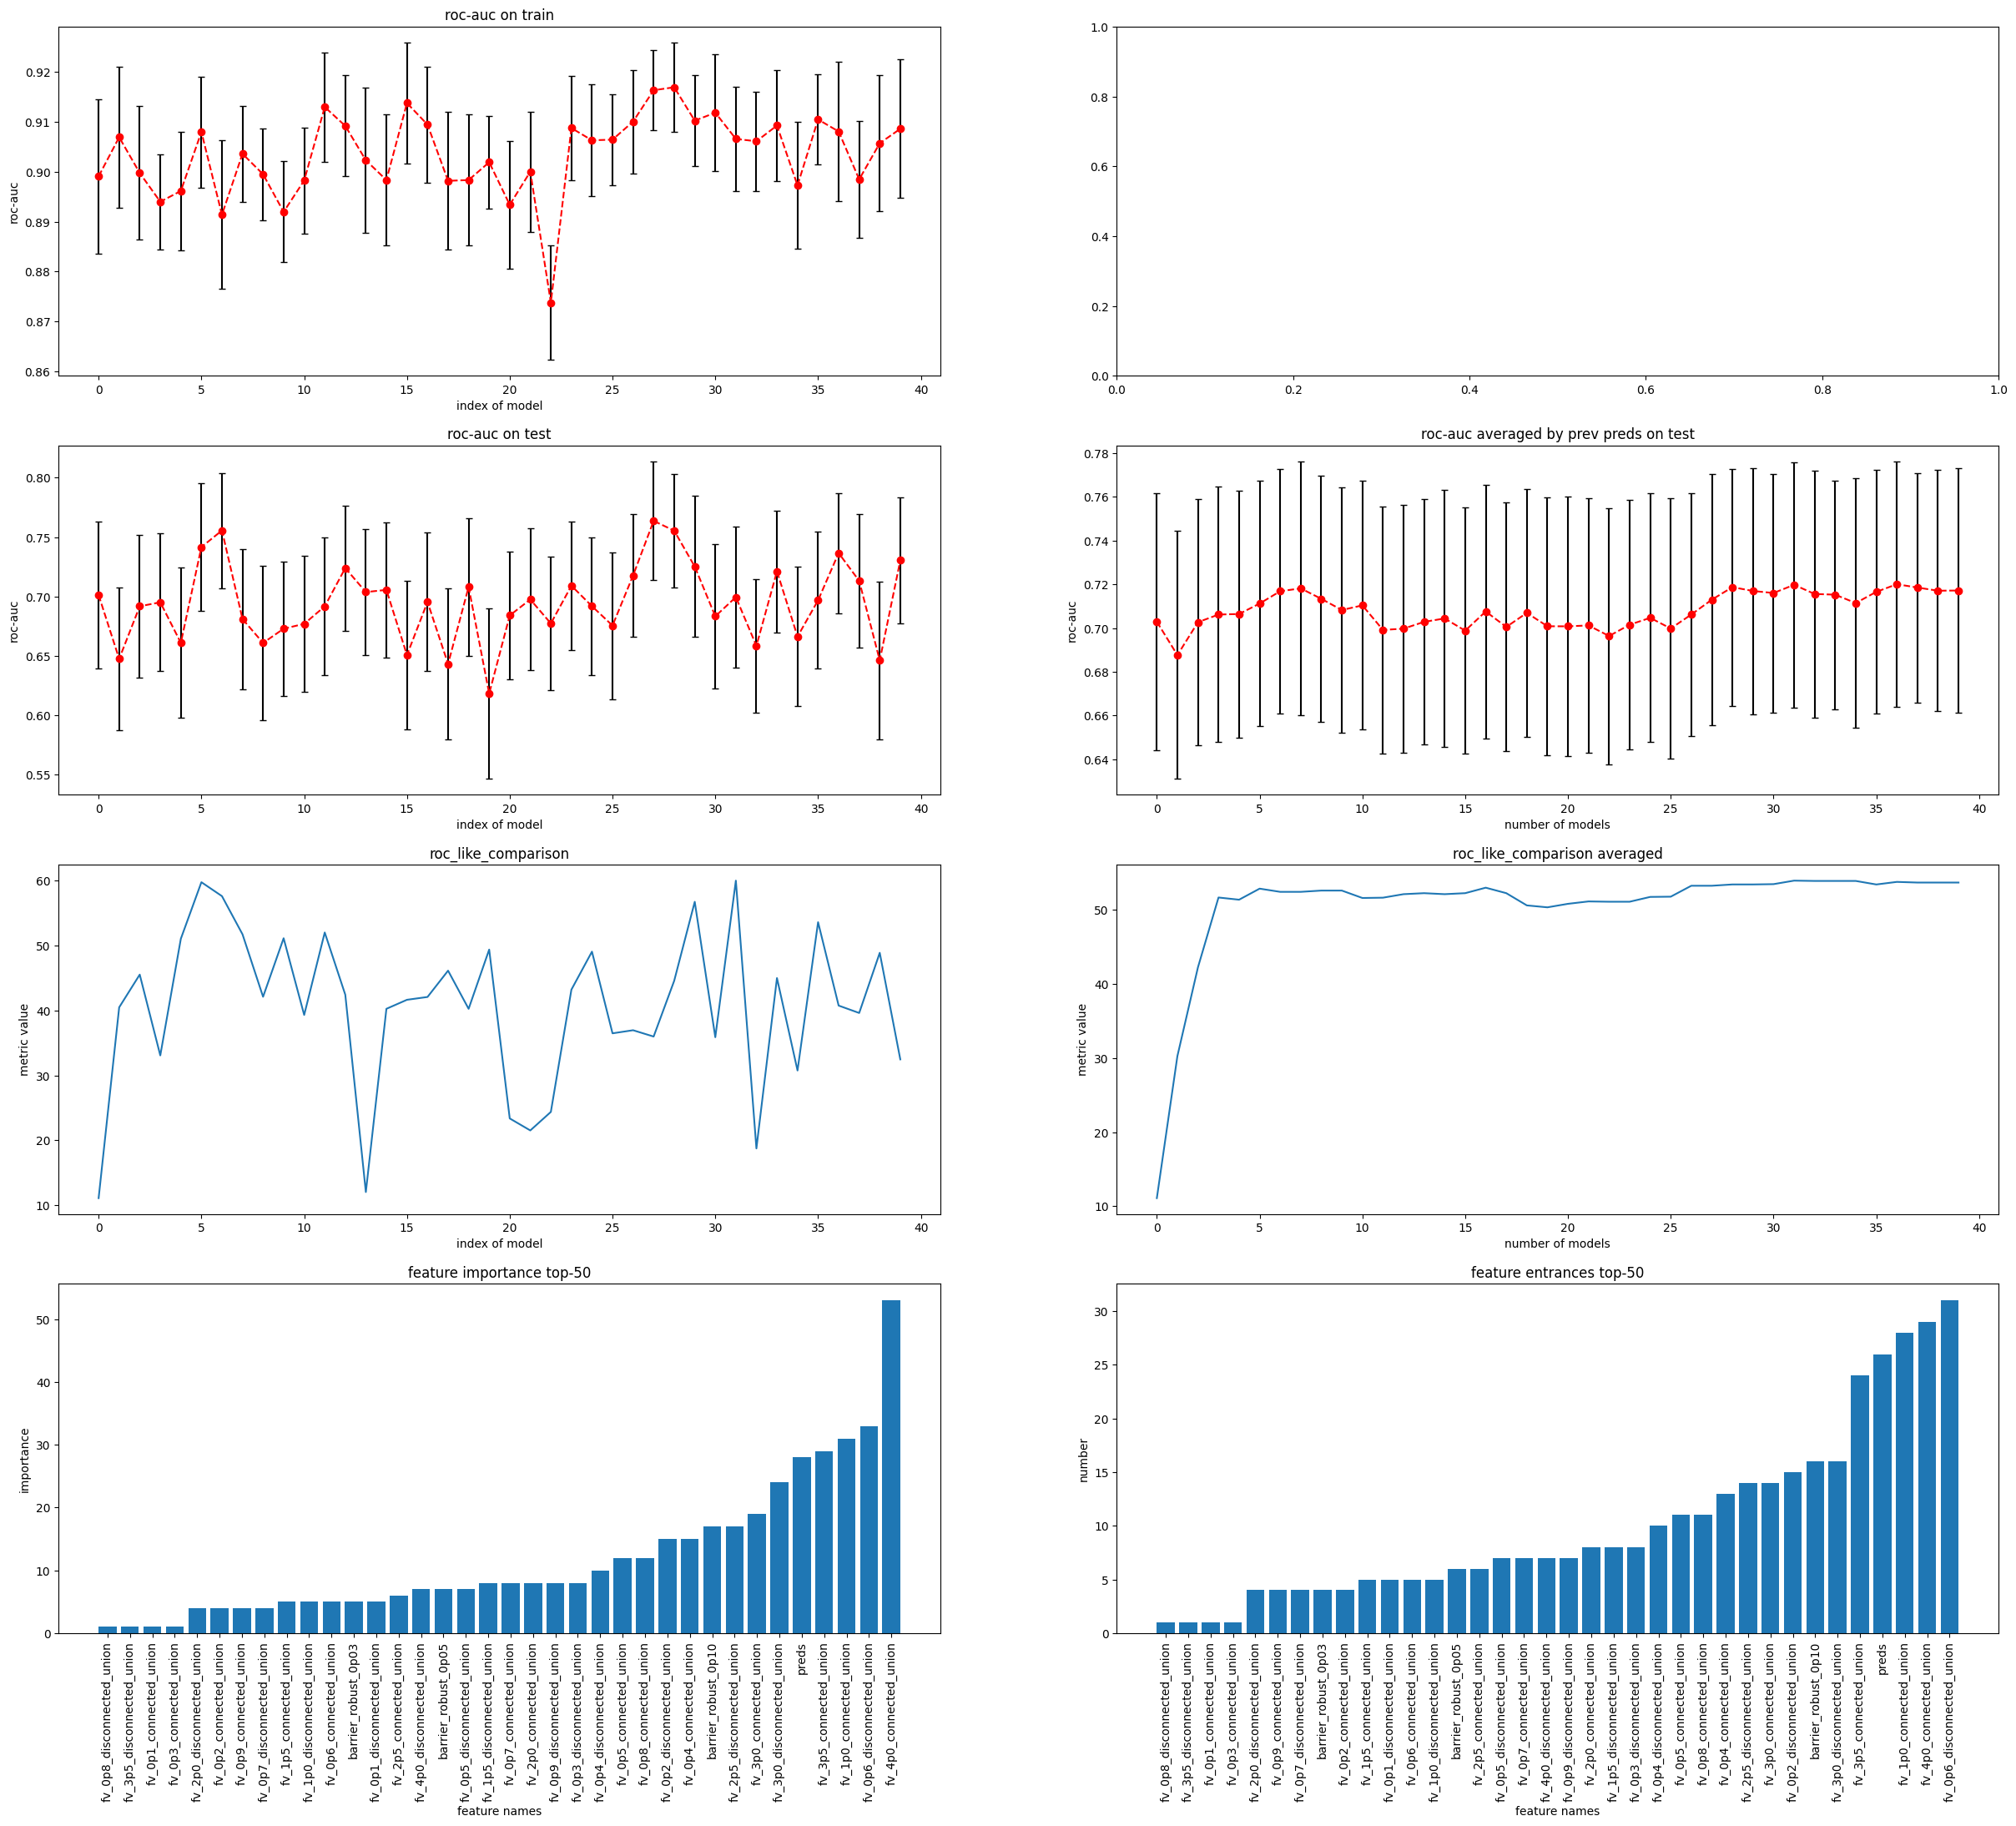

In [77]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, all_preds, y)

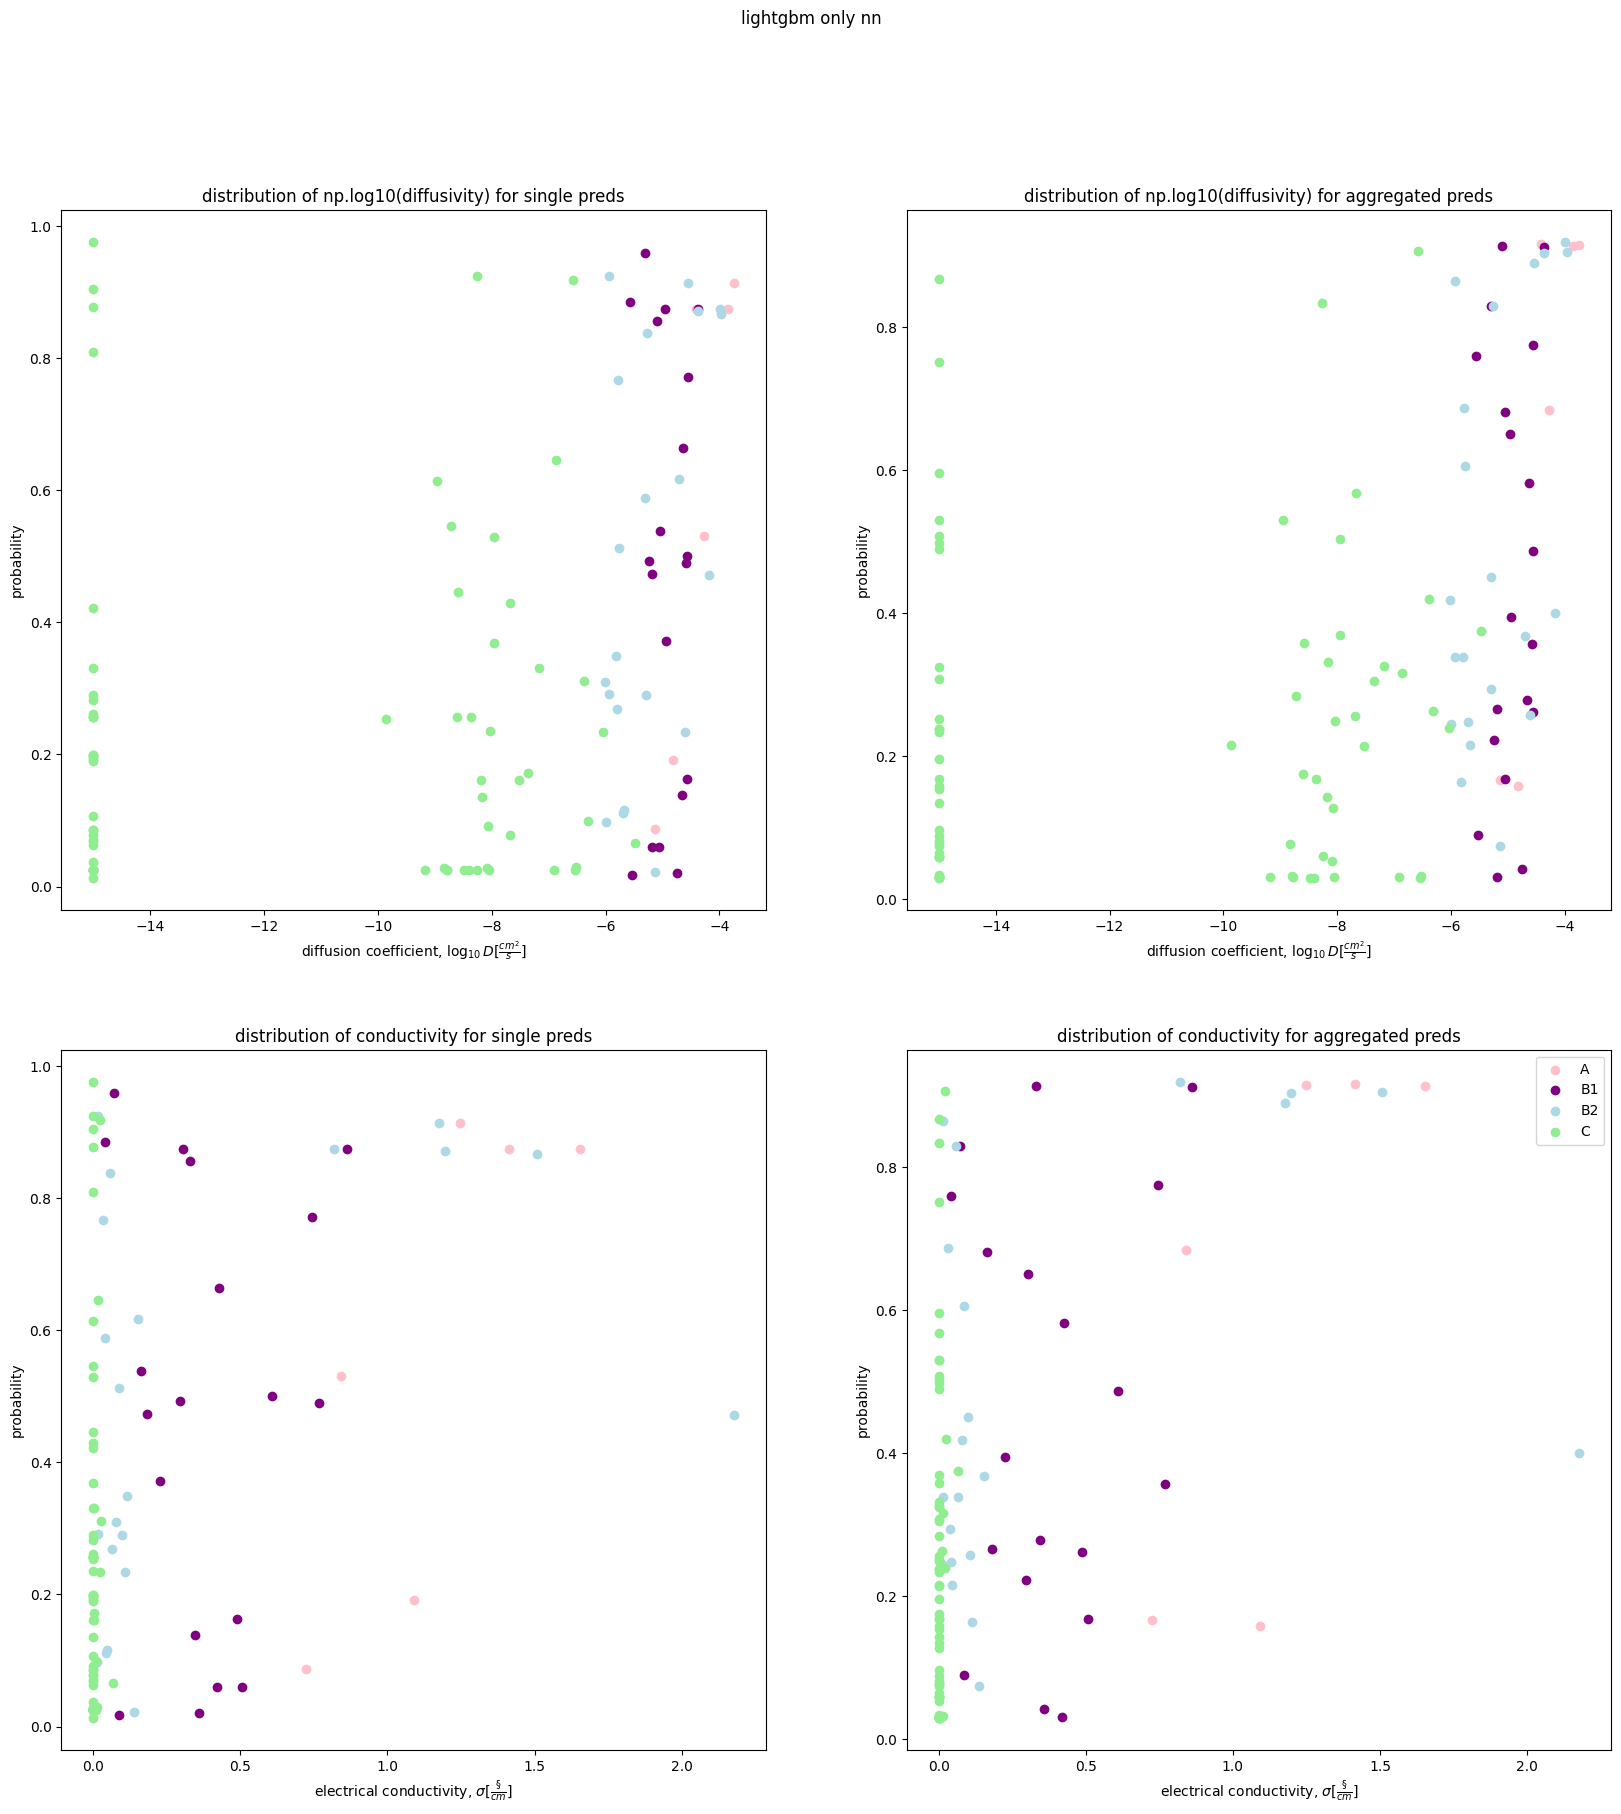

In [78]:
plot_distribution_compared(
        df_kahle_fin,
        all_preds[0],
        np.array(all_preds).sum(axis = 0) / len(all_preds), 
        'lightgbm only nn'
        )

In [177]:
df_barrier_features_kahle = pd.read_csv('barrier_features/exported.predictions.Kahle2020.v2.csv')


df_old = pd.read_csv('fv.v2.Kahle2020.csv')

df_old = df_old[['diffusion_mean_cm2_s',
'diffusion_sem_cm2_s',
 'src_id',
 'temperature']]

barrier_robust_0p_features = list(filter(lambda x: x.find('barrier_robust_0p') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
union_features = list(filter(lambda x: x.find('union') != -1 and x.find('masked1p5') == -1, df_barrier_features_kahle.columns.to_list()))
df_barrier_features_kahle = df_barrier_features_kahle[barrier_robust_0p_features + union_features + ['src_id', 'diffusion_mean_cm2_s', 'starting_structure']]

df_kahle_fin = df_barrier_features_kahle.merge(df_old, left_on=['src_id', 'diffusion_mean_cm2_s'], right_on=['src_id', 'diffusion_mean_cm2_s'])


kahle = pd.read_csv('kahle.csv')
df_kahle_fin = df_kahle_fin.merge(kahle, left_on = ['src_id', 'diffusion_mean_cm2_s', 'diffusion_sem_cm2_s'], right_on = ['src_id', 'diffusion_mean_cm2_s', 'diffusion_sem_cm2_s'])
df_kahle_fin = dataset_preprocessing(df_kahle_fin, 'structure')


X_nn = df_kahle_fin.drop([ 
    'src_id',
     'diffusion_mean_cm2_s', 
     'starting_structure', 
     'diffusion_sem_cm2_s', 
     'temperature', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err',
     'stru_label', 
     'stru_id', 
     'group',
     'structure', 
     'label'
 ], axis=1)


feature_names_nn = X_nn.columns.tolist()


feature_names_nn = np.array(feature_names_nn)[~np.all(X_nn.to_numpy() == 0, axis=0)]
X_nn = X_nn.to_numpy()
X_nn = X_nn[:, ~np.all(X_nn == 0, axis=0)]

In [178]:
df_kahle_plane, zero_columns_kahle = make_plane(df_kahle, ['stru_label', 'stru_id', 'group'])
df_kahle_plane = df_kahle_plane.drop(zero_columns_kahle, axis = 1)

for col in df_kahle_plane[df_kahle_plane.columns[df_kahle_plane.isna().any()].tolist()].isna().sum().to_frame().T.columns:
    df_kahle_plane[col].fillna((df_kahle_plane[col].mean()), inplace=True)

df_kahle_plane = df_kahle_plane[df_kahle_plane['group'] != 'group_D']
kahle = pd.read_csv('kahle.csv')
df_kahle_fin = df_kahle_plane.merge(kahle, left_on = ['stru_label', 'stru_id', 'group'], right_on = ['stru_label', 'stru_id', 'group'])


df_kahle_fin = dataset_preprocessing(df_kahle_fin, 'structure')

X_featurizers = df_kahle_fin.drop([ 
    'src_id',
     'diffusion_mean_cm2_s', 
     'diffusion_sem_cm2_s', 
     'n_Li', 
     'sigma_S_cm', 
     'sigma_S_cm_sem', 
     'sigma_S_cm_err',
     'stru_label', 
     'stru_id', 
     'group',
     'structure', 
     'label'
 ], axis=1)


feature_names_featurizers = X_featurizers.columns.tolist()


feature_names_featurizers = np.array(feature_names_featurizers)[~np.all(X_featurizers.to_numpy() == 0, axis=0)]
X_featurizers = X_featurizers.to_numpy()
X_featurizers = X_featurizers[:, ~np.all(X_featurizers == 0, axis=0)]

In [179]:
X = np.concatenate([X_featurizers, X_nn], axis = 1)
feature_weights = np.concatenate([[1 / cnt_and_name_features_kahle['_'.join(x.split('_')[1:])] for x in feature_names], np.ones(X_nn.shape[1])],axis = 0)
feature_names = np.concatenate([feature_names_featurizers, feature_names_nn], axis = 0)

  2%|▏         | 2/116 [00:00<00:16,  6.94it/s]

roc-auc on train for 0 fold with size 118: 0.8602726387536515


100%|██████████| 116/116 [00:17<00:00,  6.49it/s]


test roc-auc mean: 0.5672321784126818, std: 0.06939915393298217
mean train roc-auc: 0.8517077202915415


  2%|▏         | 2/116 [00:00<00:16,  7.01it/s]

roc-auc on train for 0 fold with size 118: 0.9102564102564101


100%|██████████| 116/116 [00:18<00:00,  6.33it/s]


test roc-auc mean: 0.7268750178115114, std: 0.05635522908996231
mean train roc-auc: 0.9081680855925109


  2%|▏         | 2/116 [00:00<00:17,  6.55it/s]

roc-auc on train for 0 fold with size 118: 0.9308666017526775


100%|██████████| 116/116 [00:18<00:00,  6.39it/s]


test roc-auc mean: 0.6632268263752896, std: 0.066519670608923
mean train roc-auc: 0.9379792215777458


  2%|▏         | 2/116 [00:00<00:17,  6.60it/s]

roc-auc on train for 0 fold with size 118: 0.9477442388834794


100%|██████████| 116/116 [00:18<00:00,  6.31it/s]


test roc-auc mean: 0.6726526772072579, std: 0.06945854225859709
mean train roc-auc: 0.9517296069493313


  2%|▏         | 2/116 [00:00<00:17,  6.53it/s]

roc-auc on train for 0 fold with size 118: 0.9545602077247646


100%|██████████| 116/116 [00:18<00:00,  6.34it/s]


test roc-auc mean: 0.6726397778683854, std: 0.06532931150330855
mean train roc-auc: 0.9581140507345235


  2%|▏         | 2/116 [00:00<00:17,  6.54it/s]

roc-auc on train for 0 fold with size 118: 0.9571567672833496


100%|██████████| 116/116 [00:18<00:00,  6.24it/s]


test roc-auc mean: 0.680889981731955, std: 0.062443065159841334
mean train roc-auc: 0.9620403272634042


  2%|▏         | 2/116 [00:00<00:17,  6.52it/s]

roc-auc on train for 0 fold with size 118: 0.9629990262901656


100%|██████████| 116/116 [00:18<00:00,  6.22it/s]


test roc-auc mean: 0.6662748752426919, std: 0.06291865458211511
mean train roc-auc: 0.9646373562261176


  2%|▏         | 2/116 [00:00<00:21,  5.35it/s]

roc-auc on train for 0 fold with size 118: 0.9633235962349886


100%|██████████| 116/116 [00:19<00:00,  6.09it/s]


test roc-auc mean: 0.6685687558650226, std: 0.0632702162150822
mean train roc-auc: 0.9667973184028213


  2%|▏         | 2/116 [00:00<00:17,  6.59it/s]

roc-auc on train for 0 fold with size 118: 0.9750081142486205


100%|██████████| 116/116 [00:18<00:00,  6.24it/s]


test roc-auc mean: 0.6647680352390032, std: 0.06476767340436938
mean train roc-auc: 0.9705579256475642


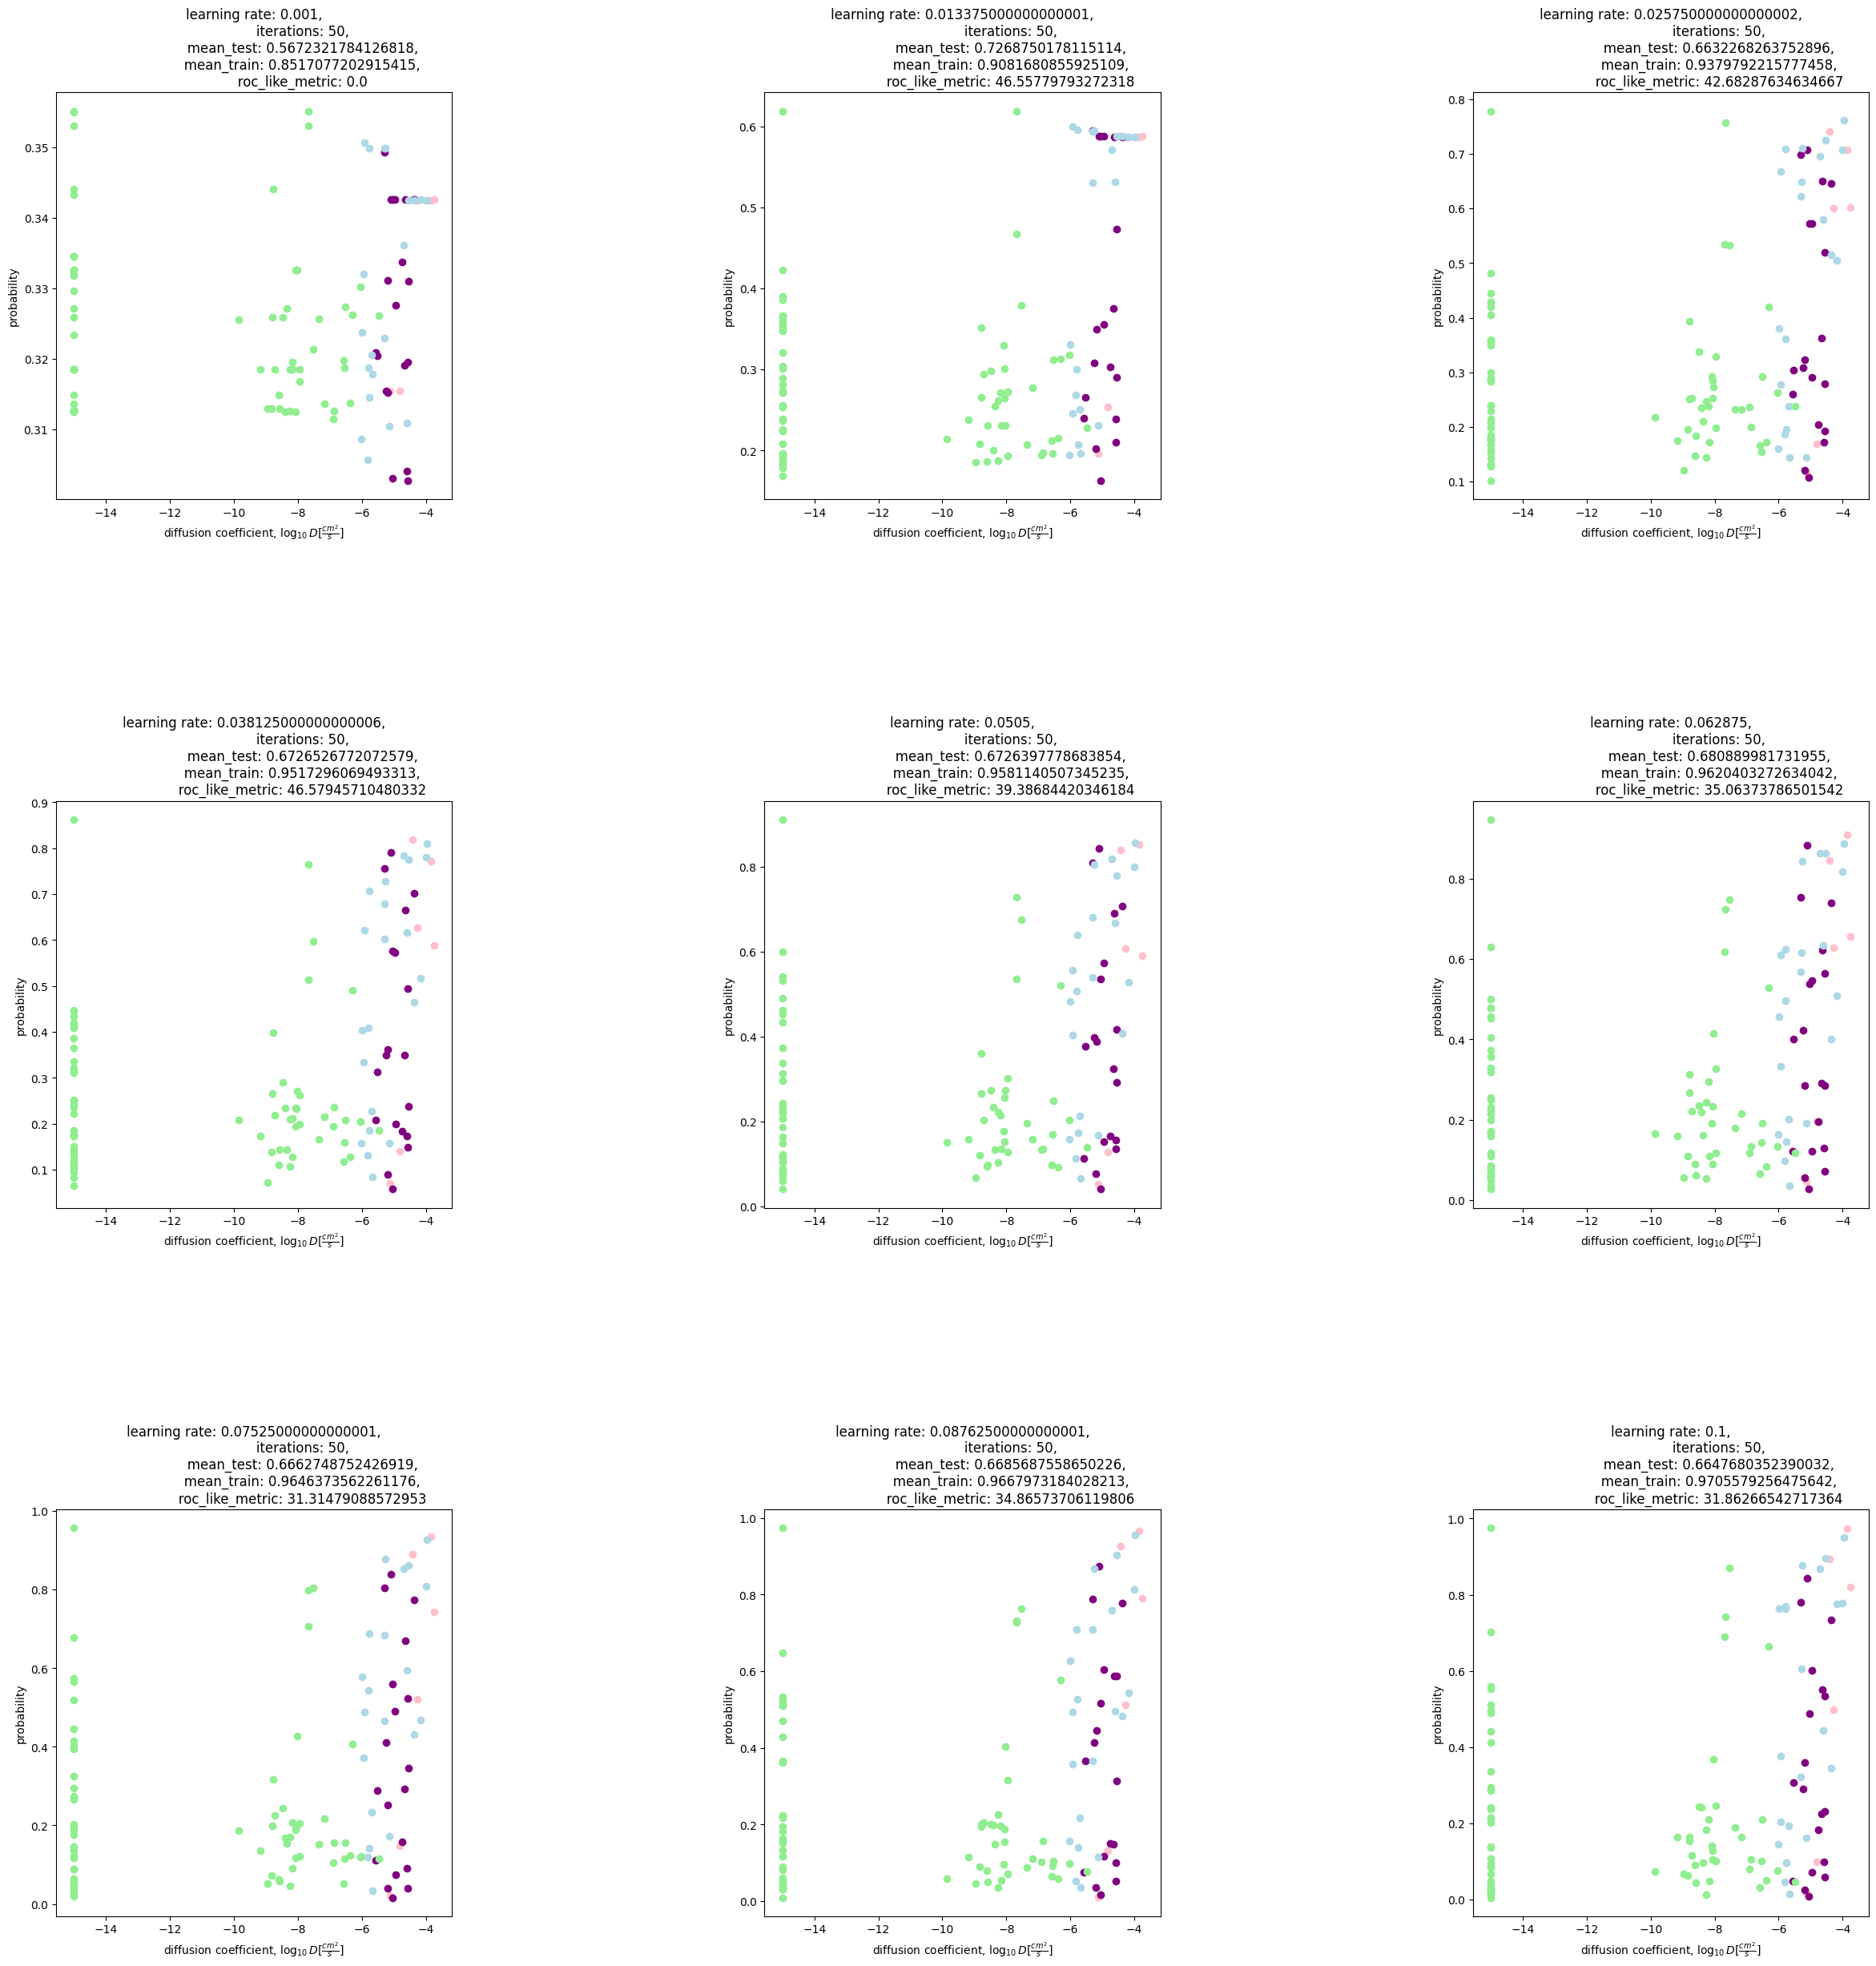

In [166]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
fig.tight_layout(pad=25.0)


params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "max_depth": 3,
        "n_estimators": 50,
        "verbosity" : -1,
    }

thr_positive = 1e-1
thr_negative = 1e-2

y = (df_kahle_fin['sigma_S_cm'] >= thr_positive).to_numpy()
weights_for_positive = (1 - df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - thr_positive) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()
weights_for_negative = (df_kahle_fin.apply(lambda x: math.erfc((x['sigma_S_cm'] - thr_negative) / x['sigma_S_cm_sem']) / 2, axis=1)).to_numpy()


for i, learning_rate in enumerate(np.linspace(0.001, 0.1, 9)):
    model_class = LGBMClassifier(**params, seed = 0, bagging_seed = 0, learning_rate = learning_rate, feature_weights = feature_weights)
    preds, model, mean_test, std_test, mean_train, std_train = train_loop(X, y, weights_for_positive, weights_for_negative, model_class, threshold = 1e-2)

    roc_like_metrics = calculate_ROClikeComparisonMetrics(df_kahle_fin, preds)['score']['preds']

    plot_diffusion_distribution(df_kahle_fin, axs, preds, i // 3, i % 3, 
                      f'learning rate: {learning_rate},\n \
                      iterations: {50},\n \
                      mean_test: {mean_test},\n \
                      mean_train: {mean_train},\n \
                      roc_like_metric: {roc_like_metrics}')
    

In [ ]:
params = {
        "objective" : "binary",
        "metric" : "binary_logloss",
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "max_depth": 3,
        "learning_rate" : 0.7,
        "n_estimators": 3,
        "verbosity" : -1,
    }


test_roc_auc, train_roc_auc, roc_like_comparison, all_preds, feature_importance, feature_entarances, y = evaluate_parameters(params, X, df_kahle_fin, feature_weights = feature_weights, thr_positive = 1e-1, thr_negative = 1e-2, model_name = 'lightgbm')

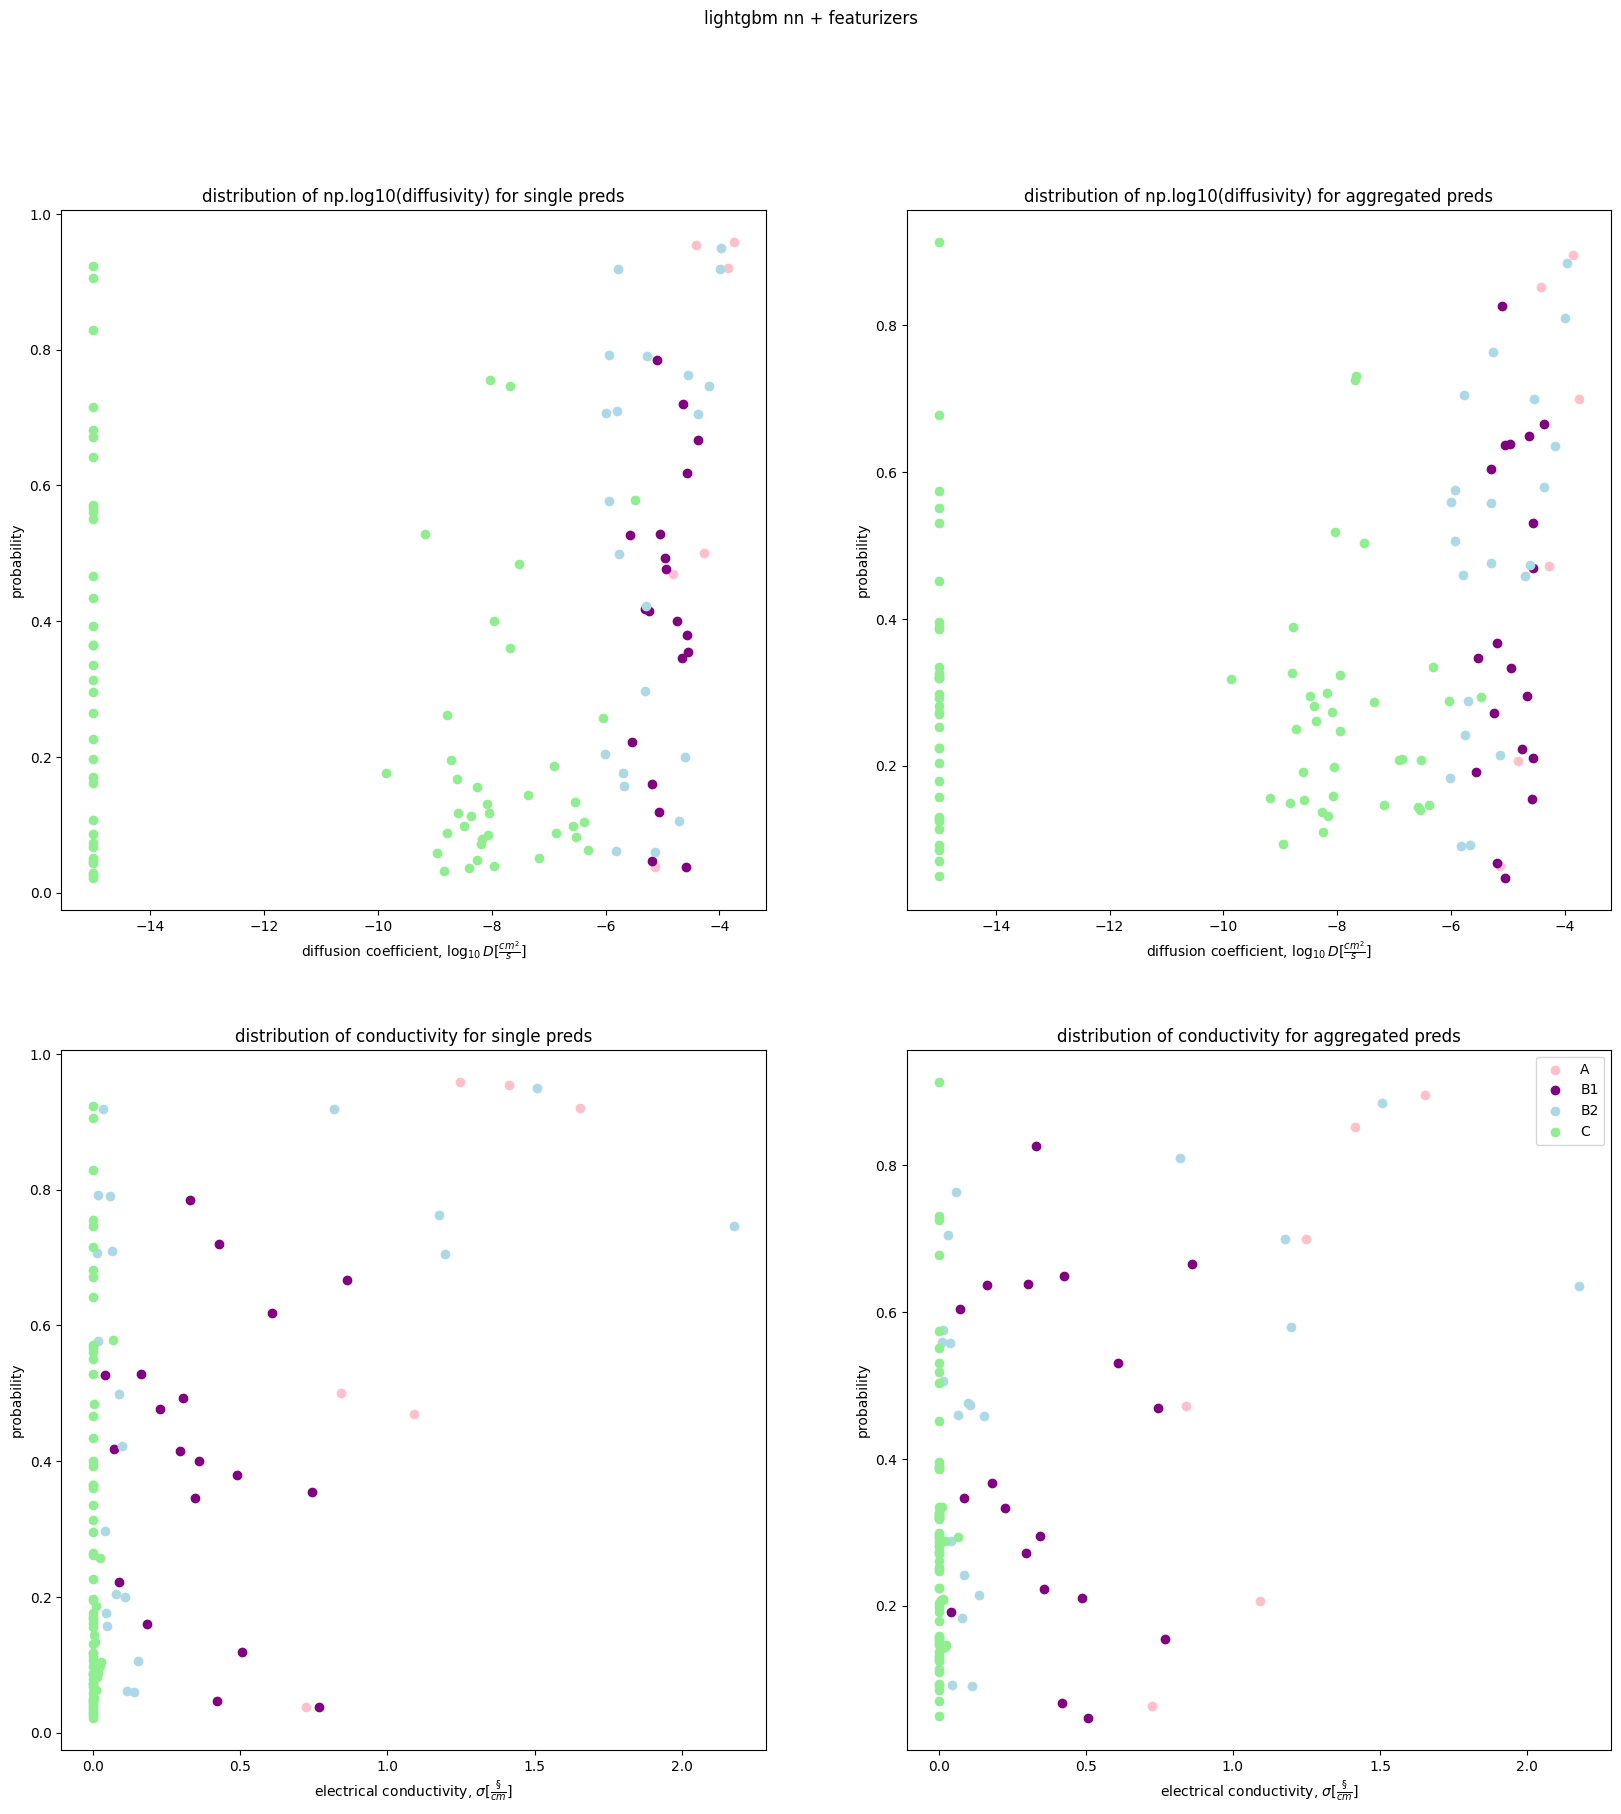

In [172]:
plot_distribution_compared(
        df_kahle_fin,
        all_preds[0],
        np.array(all_preds).sum(axis = 0) / len(all_preds), 
        'lightgbm nn + featurizers'
        )

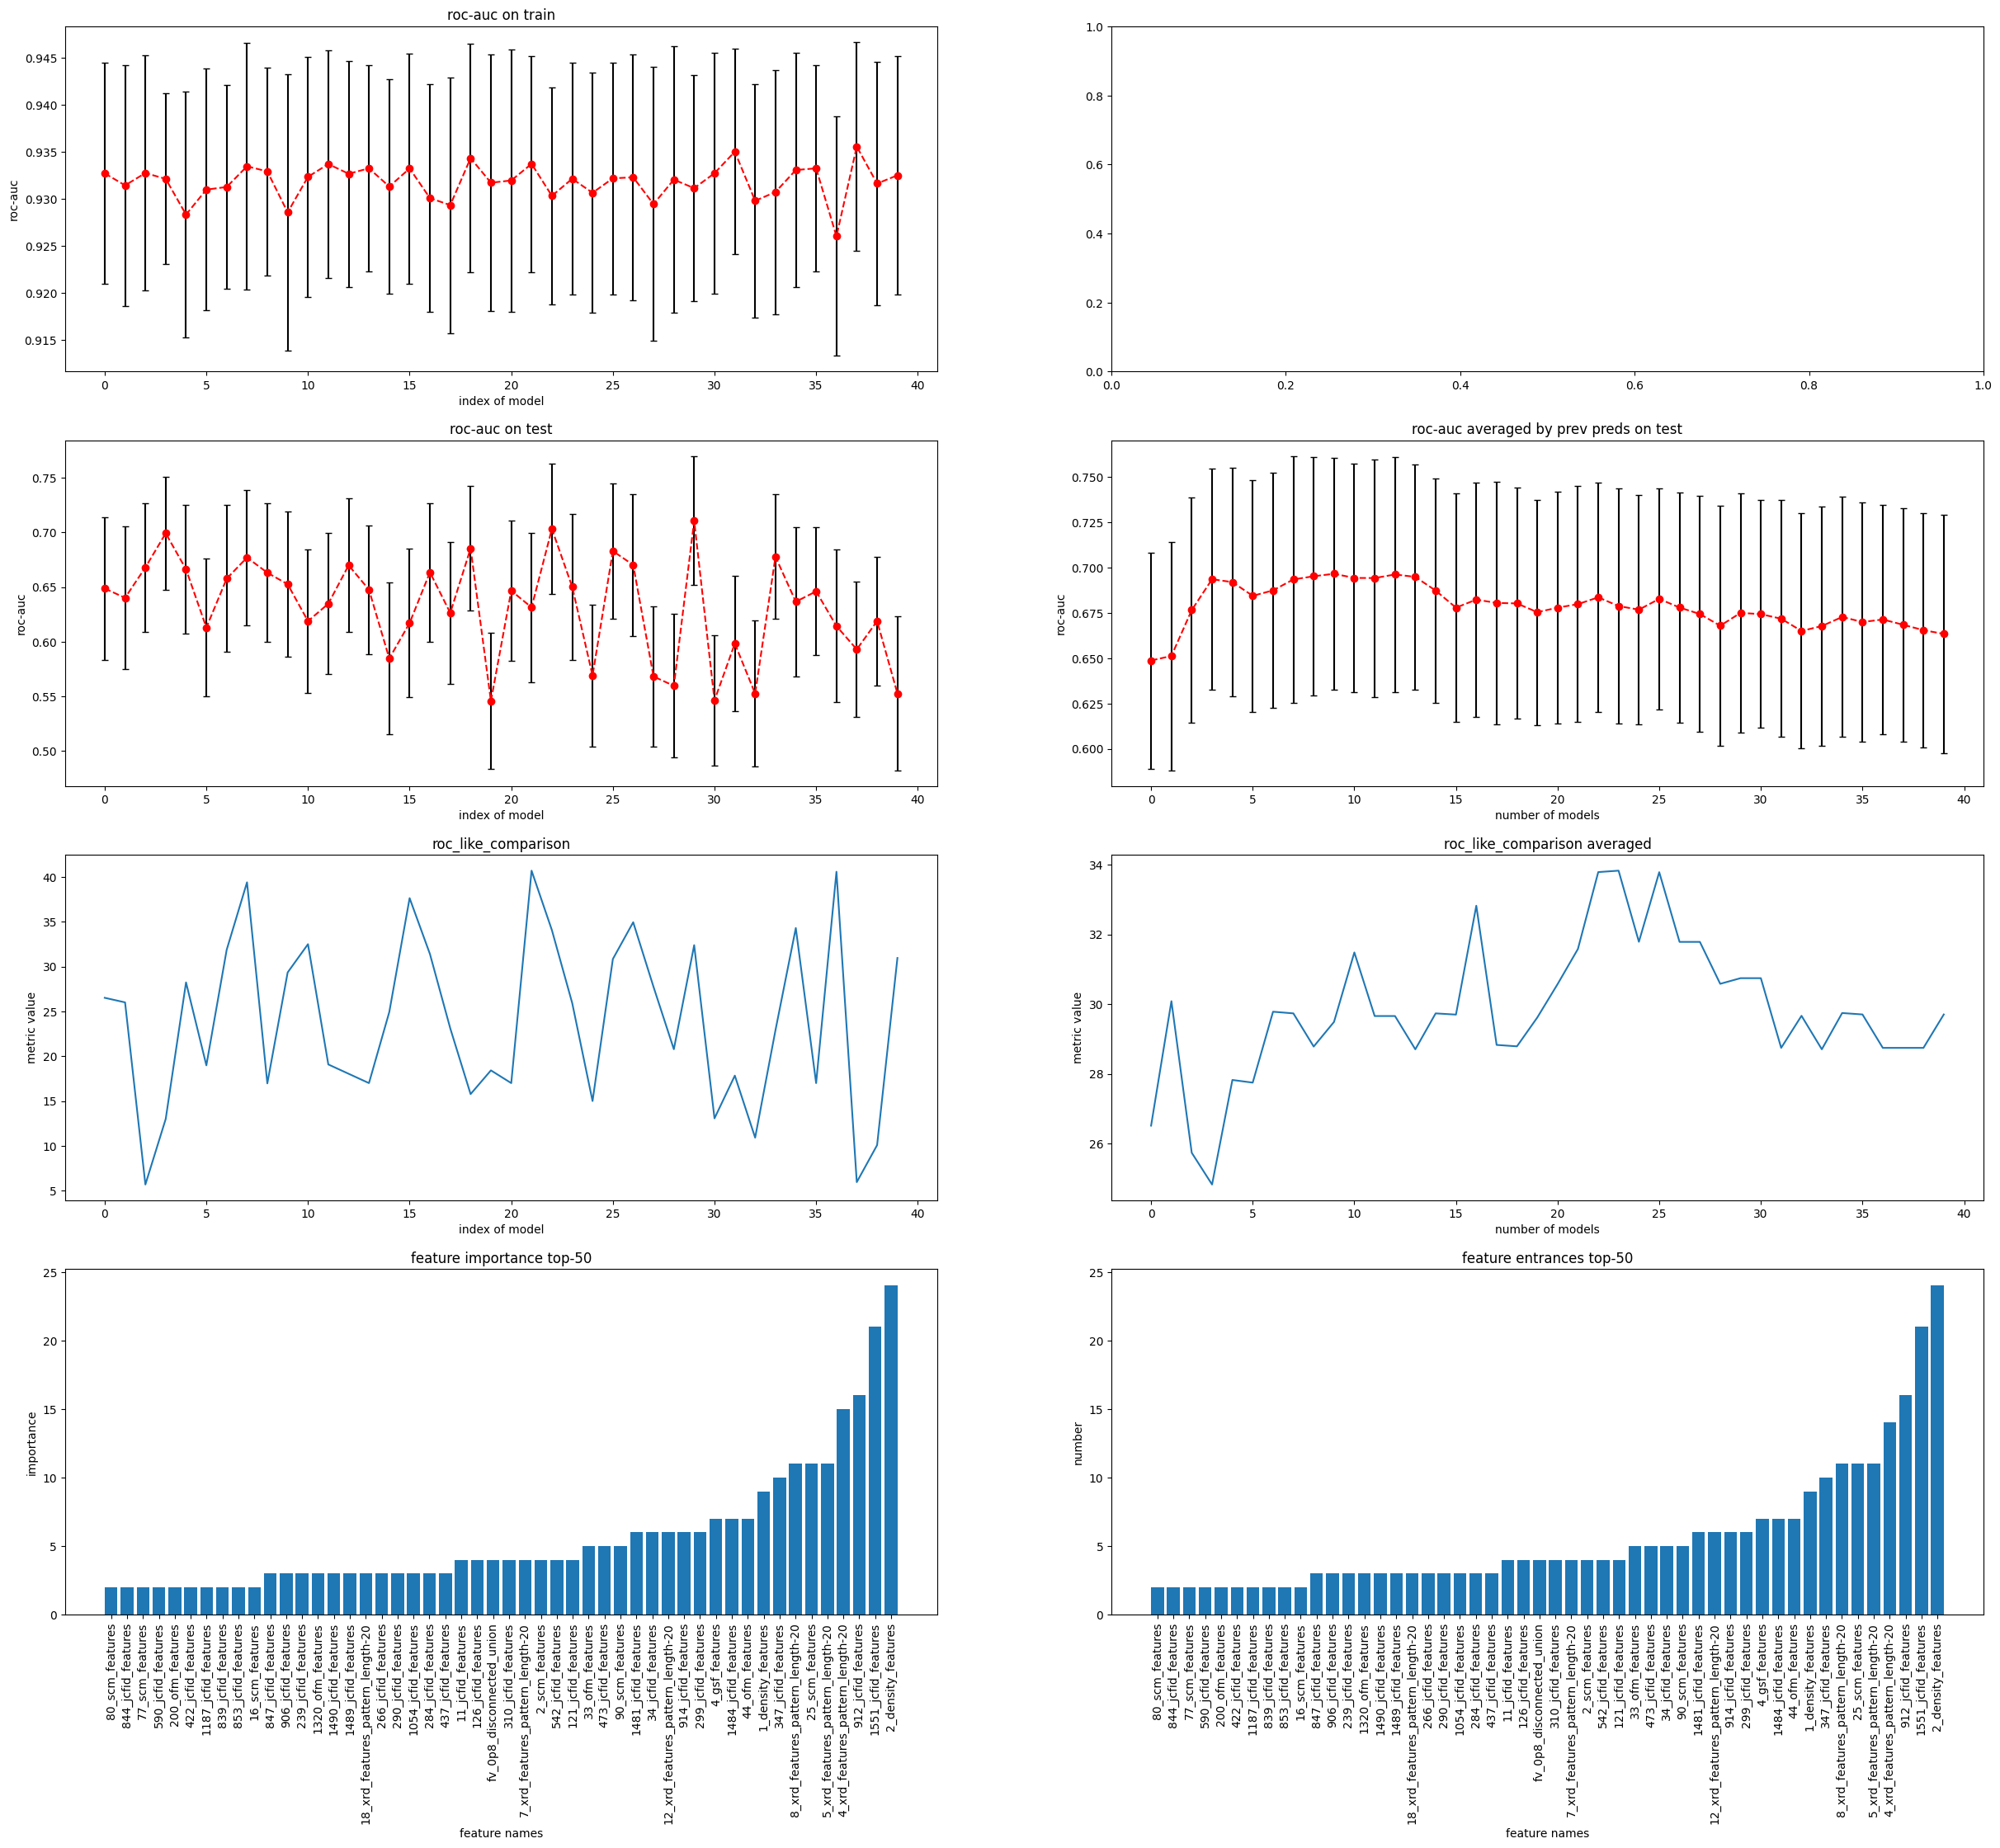

In [183]:
roc_like_comparison_averaged, roc_auc_averaged = plot_statistics(df_kahle_fin, feature_names, feature_entarances, feature_importance, train_roc_auc, test_roc_auc, roc_like_comparison, all_preds, y)

In [184]:
print(f'roc_like_comparison: {roc_like_comparison_averaged[-1]}, roc_auc on test {roc_auc_averaged[-1][0]}, mean train roc-auc {np.array(train_roc_auc)[:, 0].mean()}')

roc_like_comparison: 29.702233417960972, roc_auc on test 0.6633720629020099, mean train roc-auc 0.9317997438645751
